### Well detailled EDA for the features in the Data set
- Univariate, Bivariate and Multivariate analaysis while answering the following questions;
- what are the distributions of our target features(Attrition), and  (Monthly income)?
- explore the relationships between the target features with other predictor features
- identify features that are positvely correltaed with our target features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\hp\Downloads\train_data3.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

#### No missing values. Data types are all numerical

In [4]:
# statistical description of all numerical features
# data.describe().T
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [5]:
data.describe(include=['bool','object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,746,701,436,620,232,464,1058,751


### Exploratory data analysis

- Univariate analysis

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

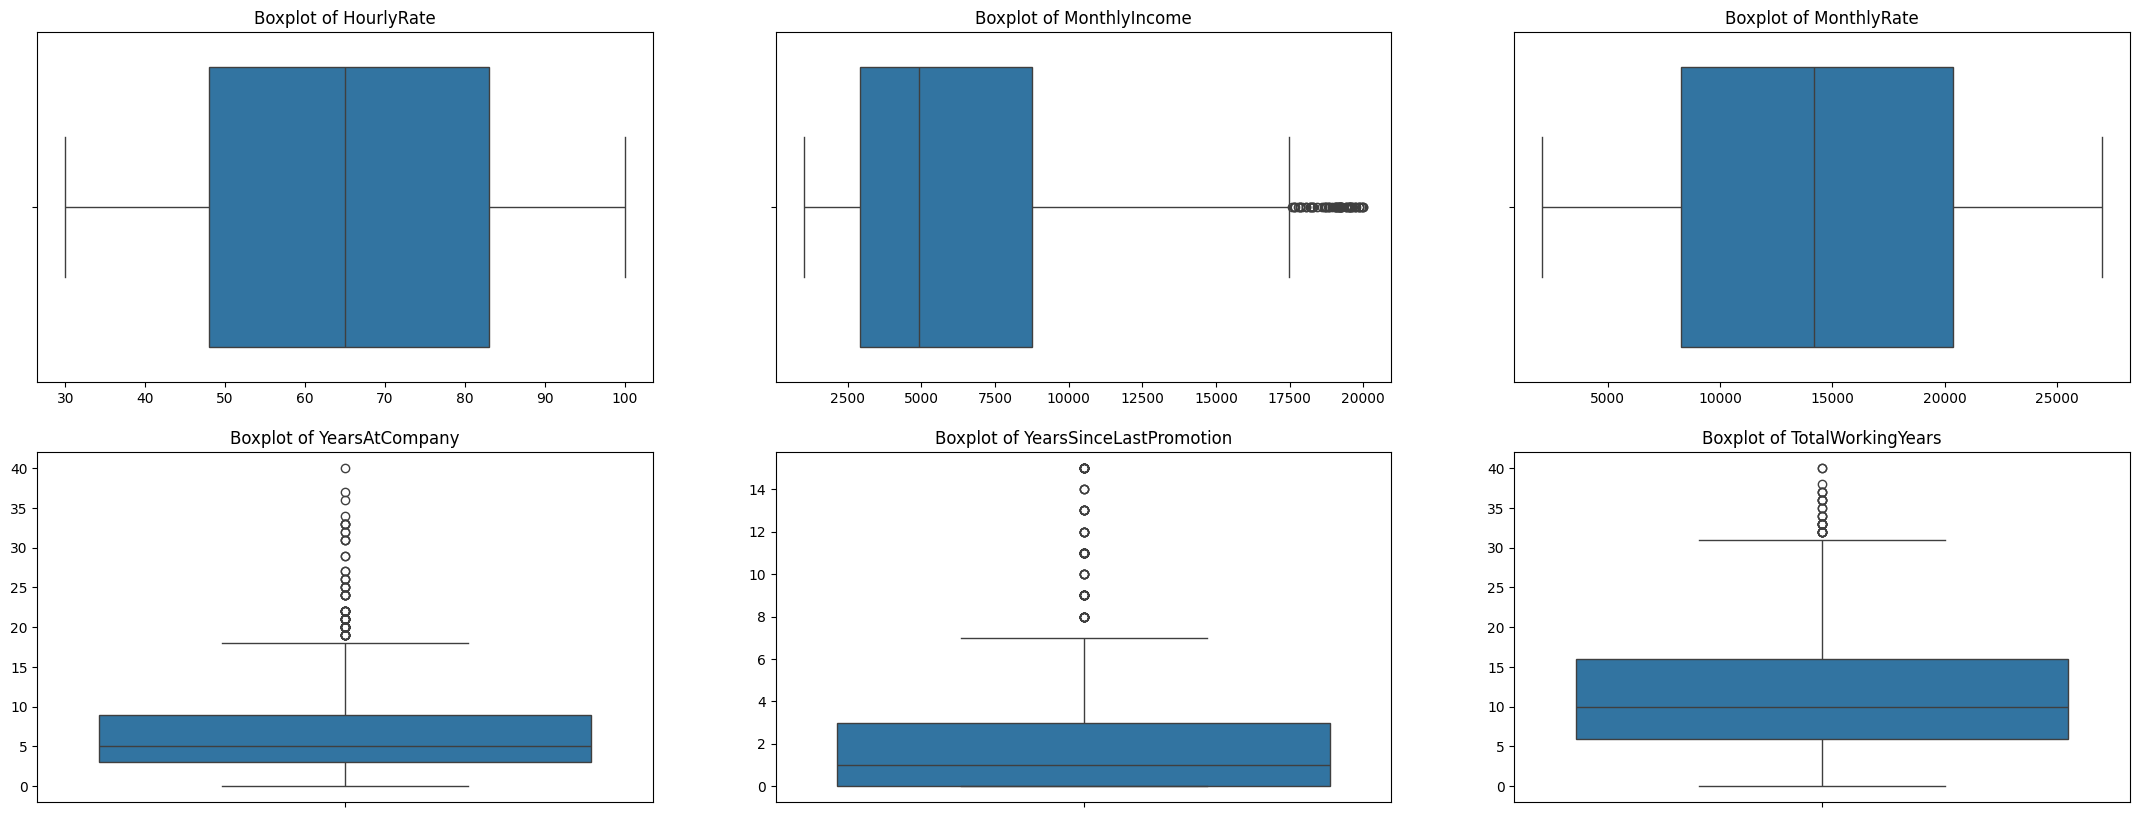

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

sns.boxplot(x='HourlyRate', data=data, ax=axs[0,0])
axs[0,0].set_title('Boxplot of HourlyRate')
axs[0,0].set_xlabel('')

sns.boxplot(x='MonthlyIncome', data=data, ax=axs[0,1])
axs[0,1].set_title('Boxplot of MonthlyIncome')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

sns.boxplot(x='MonthlyRate', data=data, ax=axs[0,2])
axs[0,2].set_title('Boxplot of MonthlyRate')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

sns.boxplot(y='YearsAtCompany', data=data, ax=axs[1,0])
axs[1,0].set_title('Boxplot of YearsAtCompany')
axs[1,0].set_ylabel('')

sns.boxplot(y='YearsSinceLastPromotion', data=data, ax=axs[1,1])
axs[1,1].set_title('Boxplot of YearsSinceLastPromotion')
axs[1,1].set_ylabel('')

sns.boxplot(y='TotalWorkingYears', data=data, ax=axs[1,2])
axs[1,2].set_title('Boxplot of TotalWorkingYears')
axs[1,2].set_ylabel('')

plt.show();

- Boxplot of years since last promotion: The median years of last promotion of employees at the company is around 1 years, with most values falling between 0 and 3. There are some outliers, with some employees last promotion being as high as 14 years.

- Boxplot of total working years: The median total working years of employees is around 10 years, with most values falling between 5 and 15. There are some outliers, with some employees total working years being as high as 40 years.

- Boxplot of years at company: The median years spent at the company is around 5 years, with most values falling between 4 and 9. There are some outliers, with some employees spending close to 40 years at the company.

- Boxplot of Hourly rate: The median hourly rate is around 65, with most values falling between 48 and 82. There are no outliers.

- Boxplot of Monthly income: The median monthly income is around 5,000, with most values falling between 2,500 and 9,500. There are some outliers, with some income as high as 20,000.

- Boxplot of Monthly rate: The median monthly rate is around 14,000, with most values falling between 8000 and 20000. There are no outliers.

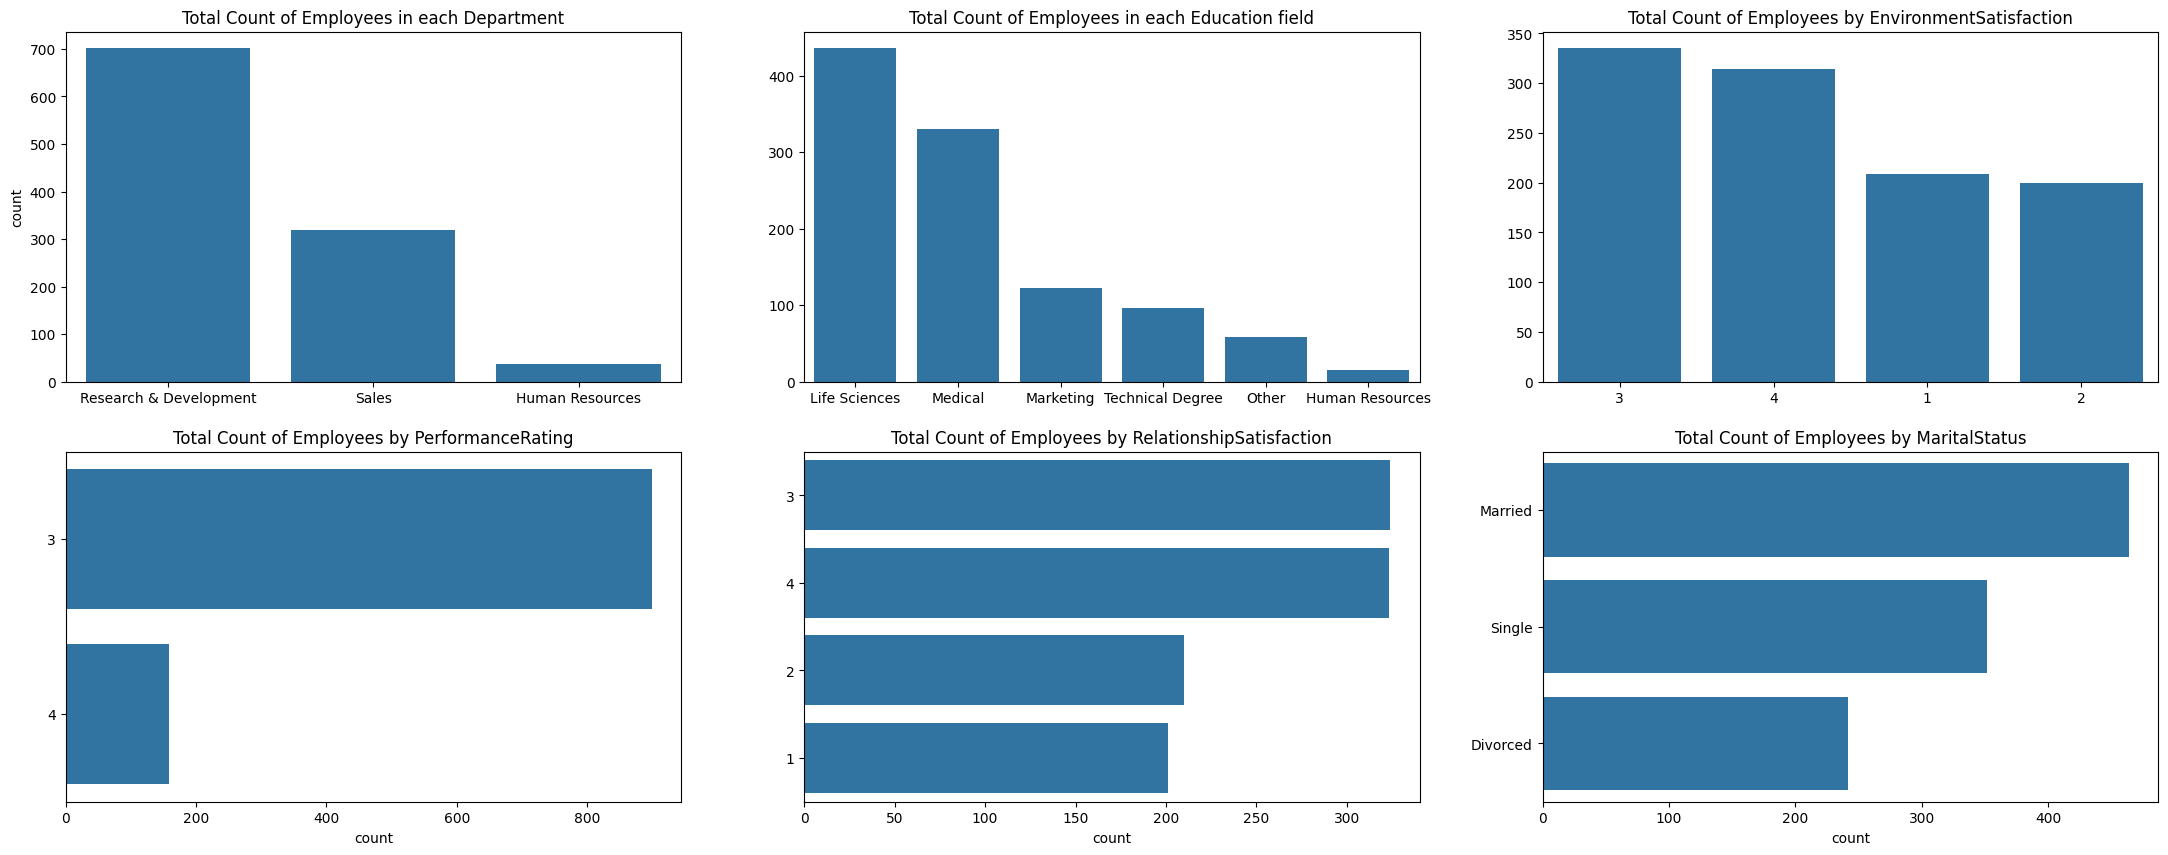

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

sns.countplot(x='Department', data=data, order=data['Department'].value_counts(ascending=False).index, ax=axs[0,0])
axs[0,0].set_title('Total Count of Employees in each Department')
axs[0,0].set_xlabel('')

sns.countplot(x='EducationField', data=data, order=data['EducationField'].value_counts(ascending=False).index, ax=axs[0,1])
axs[0,1].set_title('Total Count of Employees in each Education field')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

sns.countplot(x='EnvironmentSatisfaction', data=data, order=data['EnvironmentSatisfaction'].value_counts(ascending=False).index, ax=axs[0,2])
axs[0,2].set_title('Total Count of Employees by EnvironmentSatisfaction')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

sns.countplot(y='PerformanceRating', data=data, order=data['PerformanceRating'].value_counts(ascending=False).index, ax=axs[1,0])
axs[1,0].set_title('Total Count of Employees by PerformanceRating')
axs[1,0].set_ylabel('')

sns.countplot(y='RelationshipSatisfaction', data=data, order=data['RelationshipSatisfaction'].value_counts(ascending=False).index, ax=axs[1,1])
axs[1,1].set_title('Total Count of Employees by RelationshipSatisfaction')
axs[1,1].set_ylabel('')

sns.countplot(y='MaritalStatus', data=data, order=data['MaritalStatus'].value_counts(ascending=False).index, ax=axs[1,2])
axs[1,2].set_title('Total Count of Employees by MaritalStatus')
axs[1,2].set_ylabel('')

plt.show();

- Married employee have the highest employee count while divorced employee have the lowest employee count.
- Employees with relationship satisfaction rating of 3 and 4 have the highest employee count while those with relationship satisfaction rating of 1 have the lowest count.
- Employees with performance rating of 3 have the highest employee count while those with performance rating of 4 have the lowest count.
- Employees with environment satisfaction of 3 have the highest employee count while those with employee satisfaction rating of 2 have the lowest count.
- Research & development department have the highest employee count while the human resource department have the lowest employee count
- Life resource education field have the highest employee count while the human resource education field have the lowest employee count

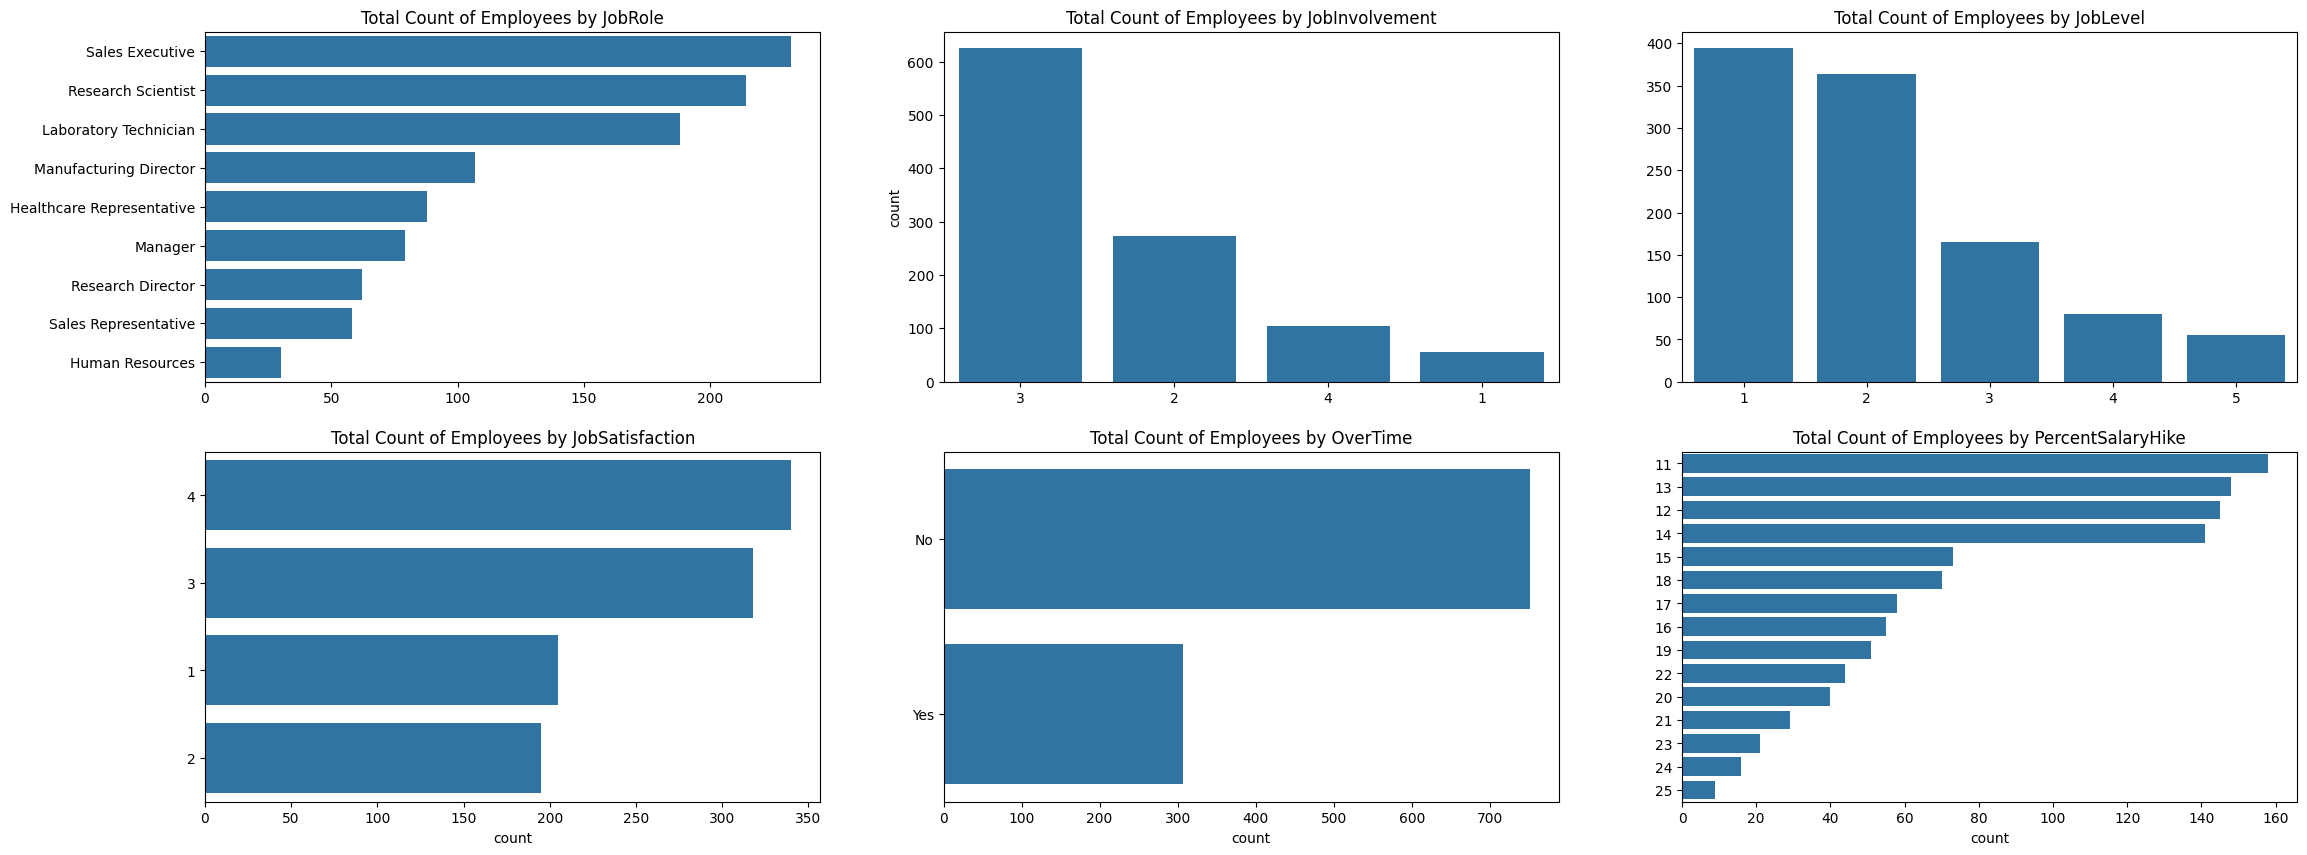

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

sns.countplot(y='JobRole', data=data, order=data['JobRole'].value_counts(ascending=False).index, ax=axs[0,0])
axs[0,0].set_title('Total Count of Employees by JobRole')
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('')

sns.countplot(x='JobInvolvement', data=data, order=data['JobInvolvement'].value_counts(ascending=False).index, ax=axs[0,1])
axs[0,1].set_title('Total Count of Employees by JobInvolvement')
axs[0,1].set_xlabel('')

sns.countplot(x='JobLevel', data=data, order=data['JobLevel'].value_counts(ascending=False).index, ax=axs[0,2])
axs[0,2].set_title('Total Count of Employees by JobLevel')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

sns.countplot(y='JobSatisfaction', data=data, order=data['JobSatisfaction'].value_counts(ascending=False).index, ax=axs[1,0])
axs[1,0].set_title('Total Count of Employees by JobSatisfaction')
axs[1,0].set_ylabel('')

sns.countplot(y='OverTime', data=data, order=data['OverTime'].value_counts(ascending=False).index, ax=axs[1,1])
axs[1,1].set_title('Total Count of Employees by OverTime')
axs[1,1].set_ylabel('')

sns.countplot(y='PercentSalaryHike', data=data, order=data['PercentSalaryHike'].value_counts(ascending=False).index, ax=axs[1,2])
axs[1,2].set_title('Total Count of Employees by PercentSalaryHike')
axs[1,2].set_ylabel('')

plt.show();

- Employees with job involvement level of 3 have the highest employee count while those with job involvement level of 1 have the lowest count.
- Employees with job level of 1 have the highest employee count while those with job level of 5 have the lowest count.
- Employees in sales executive department the highest employee count while those in human resource department have the lowest count.
- Employees with job satisfaction of 4 have the highest employee count while those with employee satisfaction rating of 2 have the lowest count.
- Employees that have no overtime have the highest employee count.

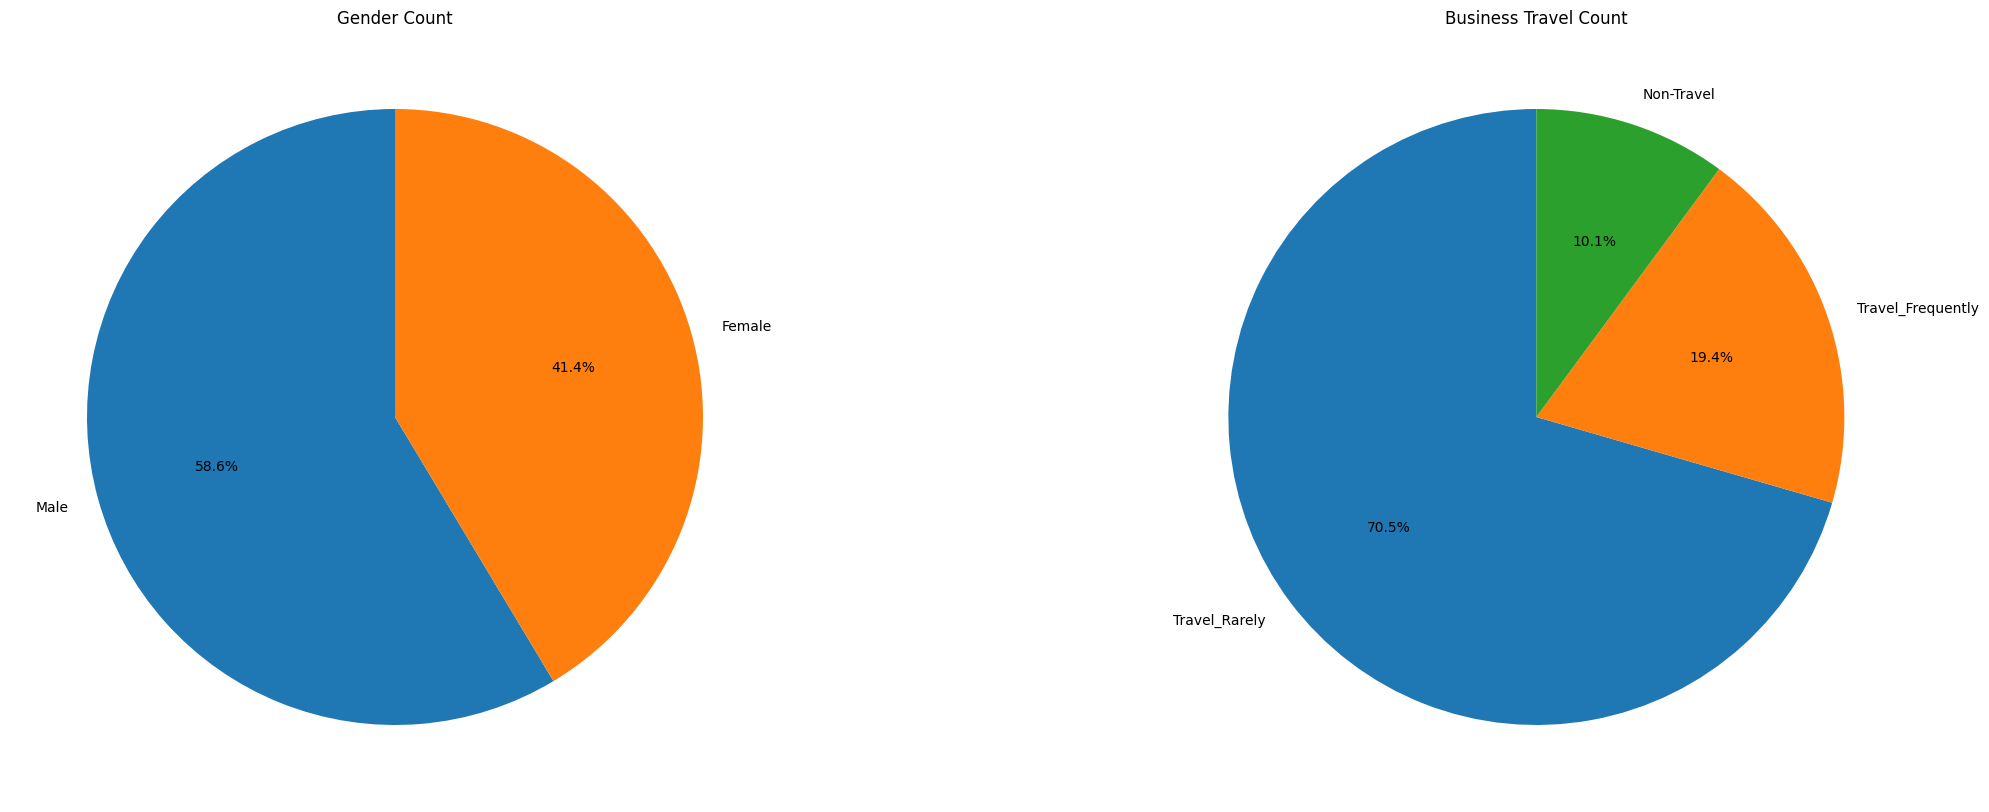

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(27,10))

gen_count = data['Gender'].value_counts(ascending=False)
axs[0].pie(gen_count, labels=gen_count.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Gender Count')

buss_count = data['BusinessTravel'].value_counts(ascending=False)
axs[1].pie(buss_count, labels=buss_count.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Business Travel Count')

plt.show();

- 70.5% of the employees rarely travel while only 19.4% of employee travel frequesntly. 10.1% of employees have not travelled.
- Most of the employees in the company are male (58.6%)

C:\Users\hp\AppData\Local\Temp\ipykernel_14204\4279939064.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


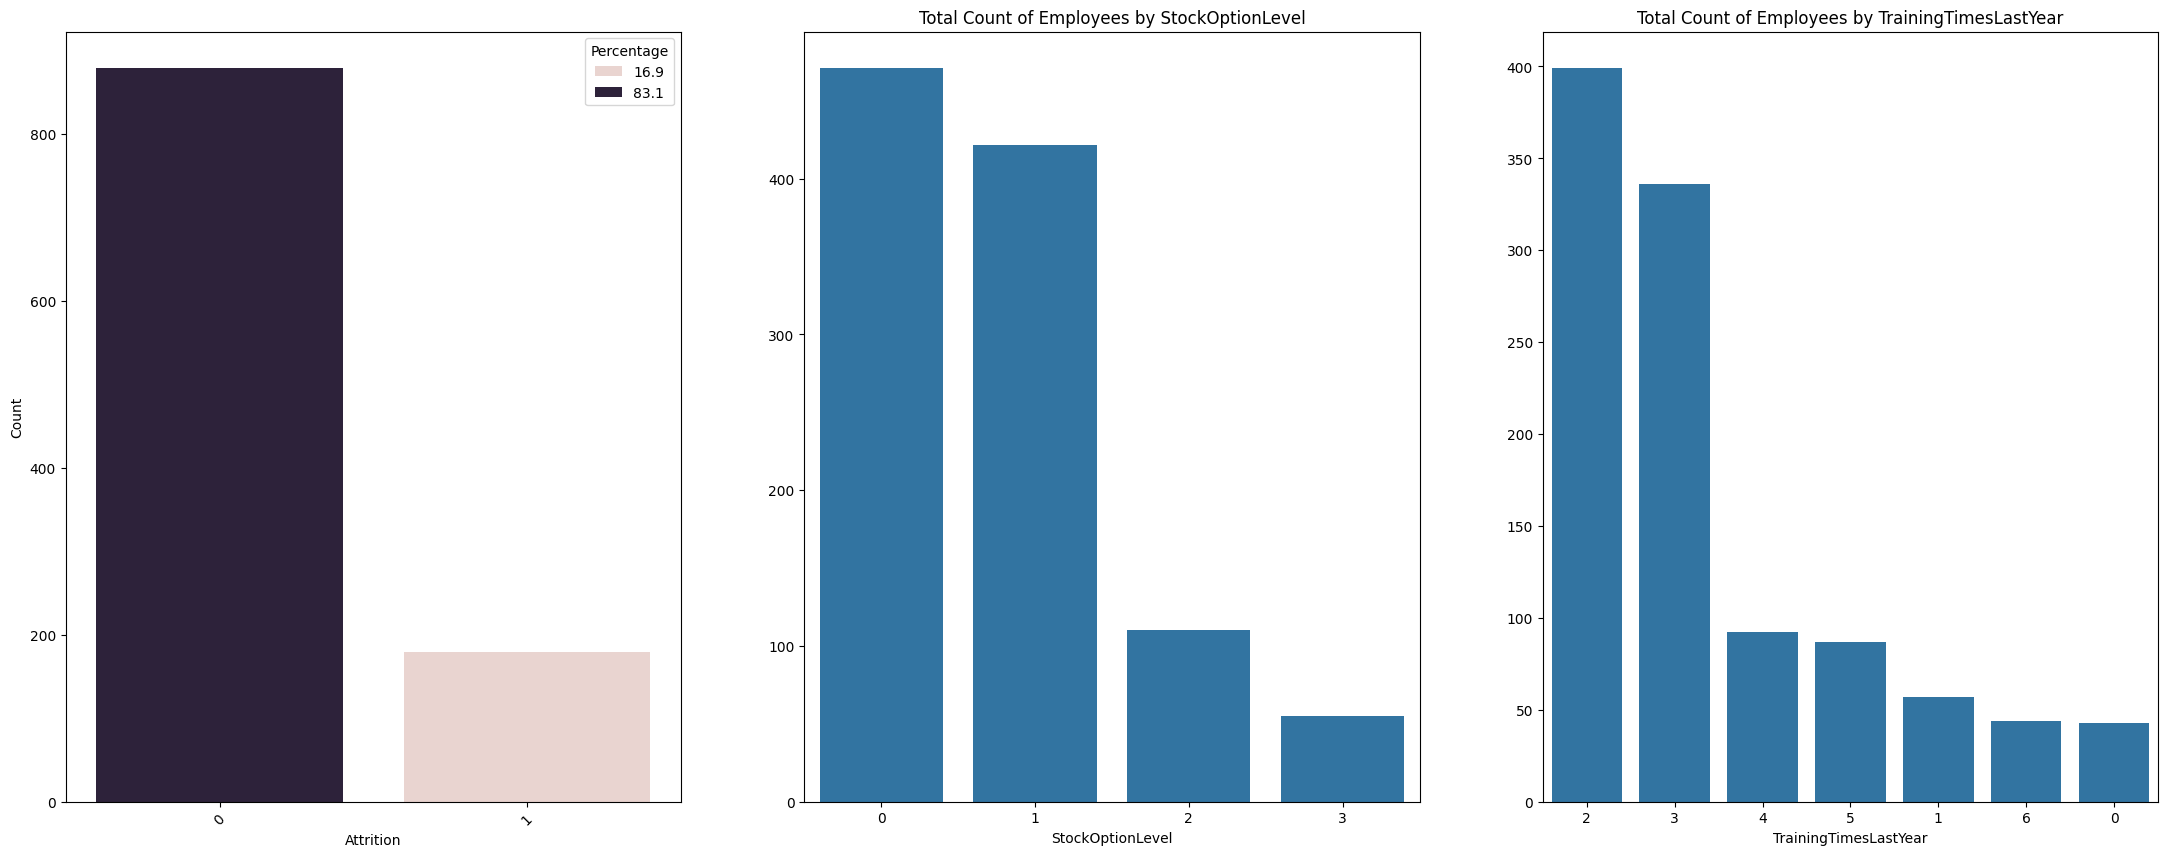

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(27, 10))

att_count = data['Attrition'].value_counts(ascending=False)
total_count = att_count.sum()
df = pd.DataFrame({'Attrition': att_count.index, 'Count': att_count, 'Percentage': round(((att_count / total_count) * 100),1)})
ax = sns.barplot(x='Attrition', y='Count', hue='Percentage', data=df, ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

sns.countplot(x='StockOptionLevel', data=data, order=data['StockOptionLevel'].value_counts(ascending=False).index, ax=axs[1])
axs[1].set_title('Total Count of Employees by StockOptionLevel')
axs[1].set_ylabel('')

sns.countplot(x='TrainingTimesLastYear', data=data, order=data['TrainingTimesLastYear'].value_counts(ascending=False).index, ax=axs[2])
axs[2].set_title('Total Count of Employees by TrainingTimesLastYear')
axs[2].set_ylabel('')

plt.show();

- Overall, the company have an attrition rate of 16.9%
- Employees with no stock option level have the higest emploee count while those with stock option level of 3 have the lowest employee count.
- Employees that had 2 trainings in the previous year have the highest employee count while the lowest employee count were employees with no trainings in the previous year.

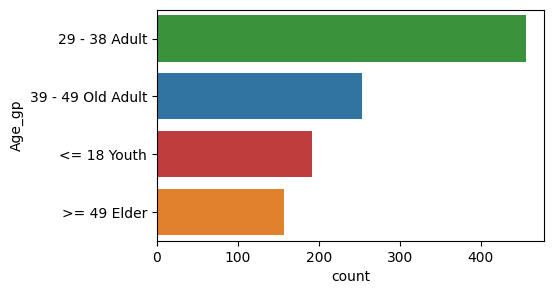

In [12]:
18 - 60
# creating an age group bracket
def age_group(x):
    if x <= 28:
        return '<= 18 Youth'
    elif x <= 38:
        return '29 - 38 Adult'
    elif x <= 48:
        return '39 - 49 Old Adult'
    else:
        return '>= 49 Elder'
    
data['Age_gp'] = data['Age'].apply(age_group)

# visualize the count of each age group
plt.figure(figsize=(5,3))

sns.countplot(y=data['Age_gp'], hue=data['Age_gp'], order=data['Age_gp'].value_counts(ascending=False).index);

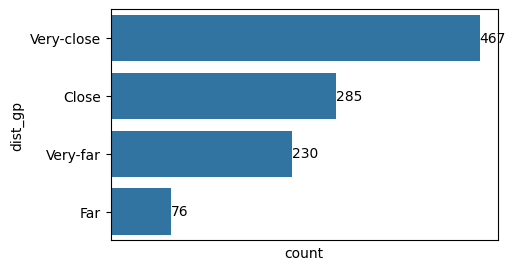

In [13]:
# creating an distance group bracket
def distance(x):
    if x <= 5:
        return 'Very-close'
    elif x <= 10:
        return 'Close'
    elif x <= 15:
        return 'Far'
    else:
        return 'Very-far'
    
data['dist_gp'] = data['DistanceFromHome'].apply(distance)

# visualize the count of each distance
plt.figure(figsize=(5,3))

ax = sns.countplot(y=data['dist_gp'], order=data['dist_gp'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=data['dist_gp'].value_counts(ascending=False).values)
ax.xaxis.set_ticks([]);

- Most of the employee (44%) live very close to the comapny while only 7% of the employee live far. 22% of the emploees live very far.

- Most of the employees fall into the Adult age bracket while the elder age group have the least count of employees.

#### EDA - Bivariate Analysis

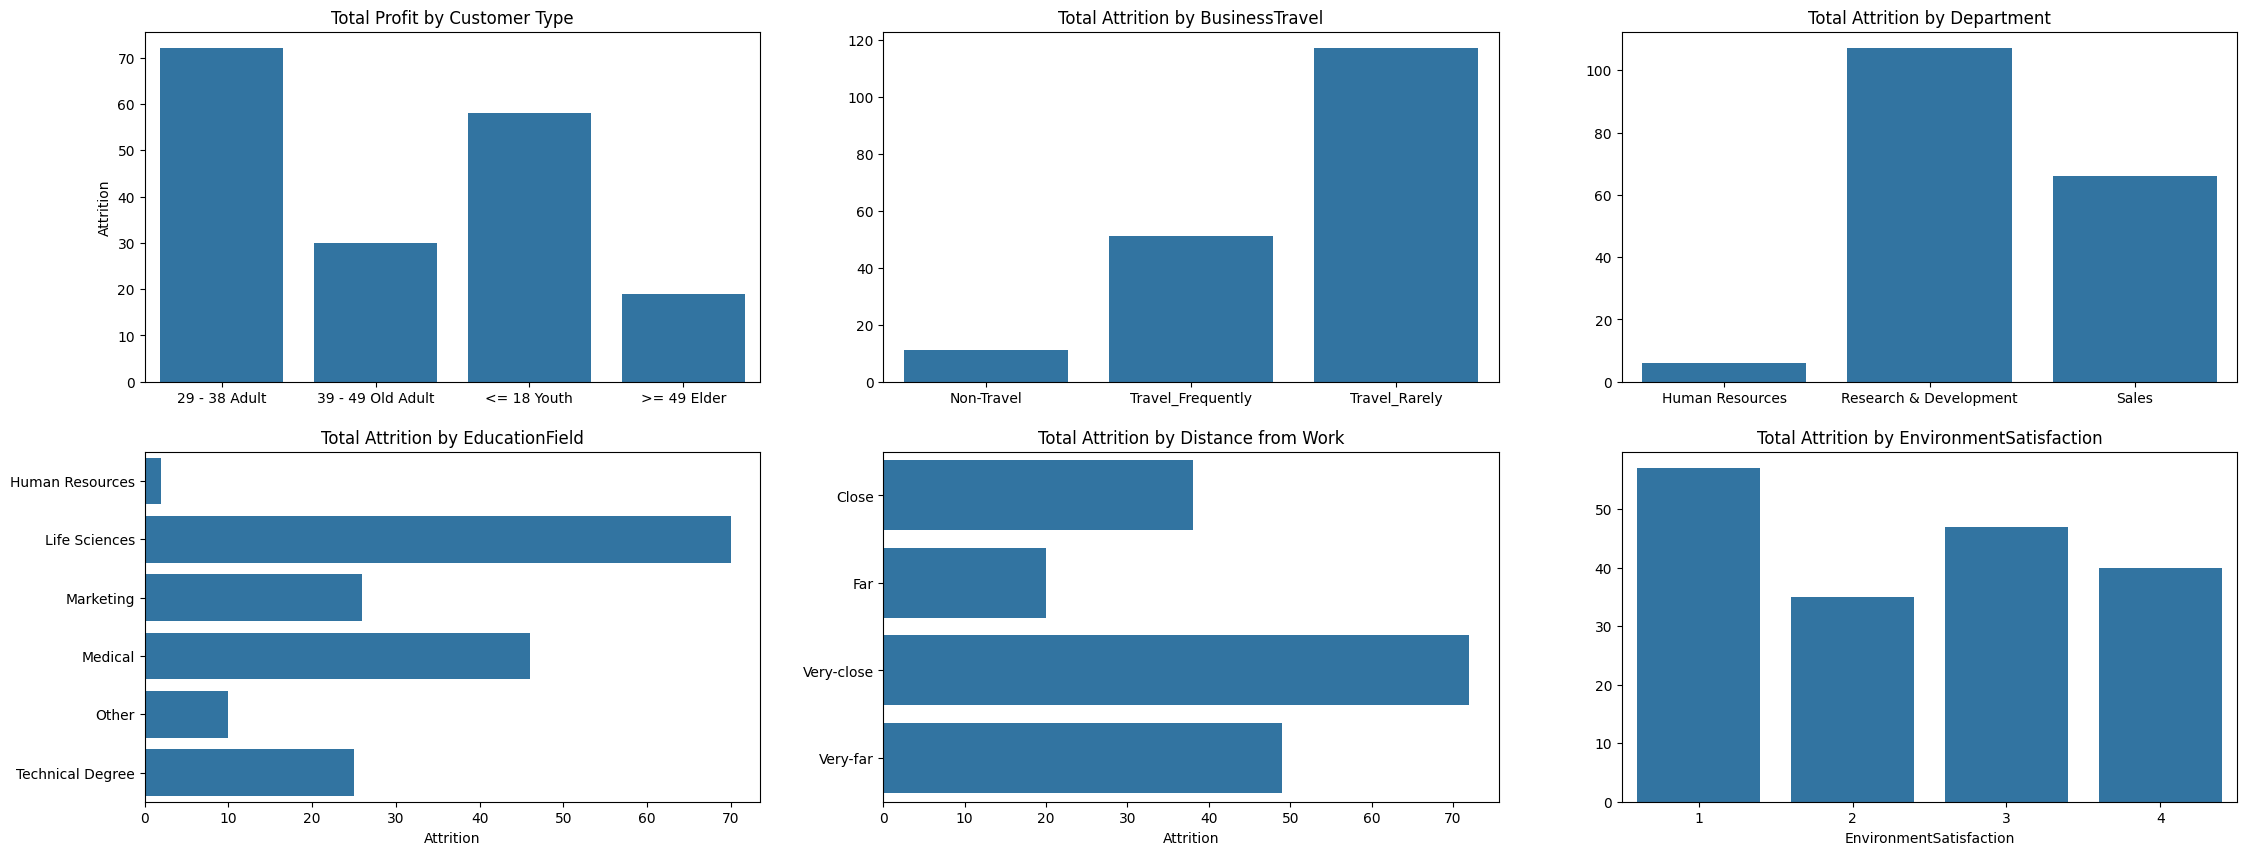

In [14]:
# bivariate analysis for categorical variables - Attrition
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

age_att = data.groupby('Age_gp')['Attrition'].sum().reset_index()
sns.barplot(x='Age_gp', data=age_att, y='Attrition', ax=axs[0,0])
axs[0,0].set_title('Total Profit by Customer Type')
axs[0,0].set_xlabel('')

buss_att = data.groupby('BusinessTravel')['Attrition'].sum().reset_index()
sns.barplot(x='BusinessTravel', data=buss_att, y='Attrition', ax=axs[0,1])
axs[0,1].set_title('Total Attrition by BusinessTravel')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

dept_att = data.groupby('Department')['Attrition'].sum().reset_index()
sns.barplot(x='Department', data=dept_att, y='Attrition', ax=axs[0,2])
axs[0,2].set_title('Total Attrition by Department')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

ed_att = data.groupby('EducationField')['Attrition'].sum().reset_index()
sns.barplot(y='EducationField', data=ed_att, x='Attrition', ax=axs[1,0])
axs[1,0].set_title('Total Attrition by EducationField')
axs[1,0].set_ylabel('')

dist_att = data.groupby('dist_gp')['Attrition'].sum().reset_index()
sns.barplot(y='dist_gp', data=dist_att, x='Attrition', ax=axs[1,1])
axs[1,1].set_title('Total Attrition by Distance from Work')
axs[1,1].set_ylabel('')


gen_att = data.groupby('EnvironmentSatisfaction')['Attrition'].sum().reset_index()
sns.barplot(x='EnvironmentSatisfaction', data=gen_att, y='Attrition', ax=axs[1,2])
axs[1,2].set_title('Total Attrition by EnvironmentSatisfaction')
axs[1,2].set_ylabel('');

- The adult age group have the highest attrition count while the elder age group have the lowest attririon count.
- Employees that do not travel have the lowest attrition count while employees that rarely travel have the highest attrition count.
- Employees in the research & development department have the highest attrition count while employees in the human resource department have the lowest attrition count.
- Employees that live very close to the company have the highest attrition count while those taht live far from the company have the lowest attrition count.
- The employees in the life science department have the highest attrition count while those in the human resource department have the lowest attrition count.
- Employees that have an environment satisfaction of 1 have the highest attrition coount while those that have an environment satisfaction level of 2 have the lowest attrition count.

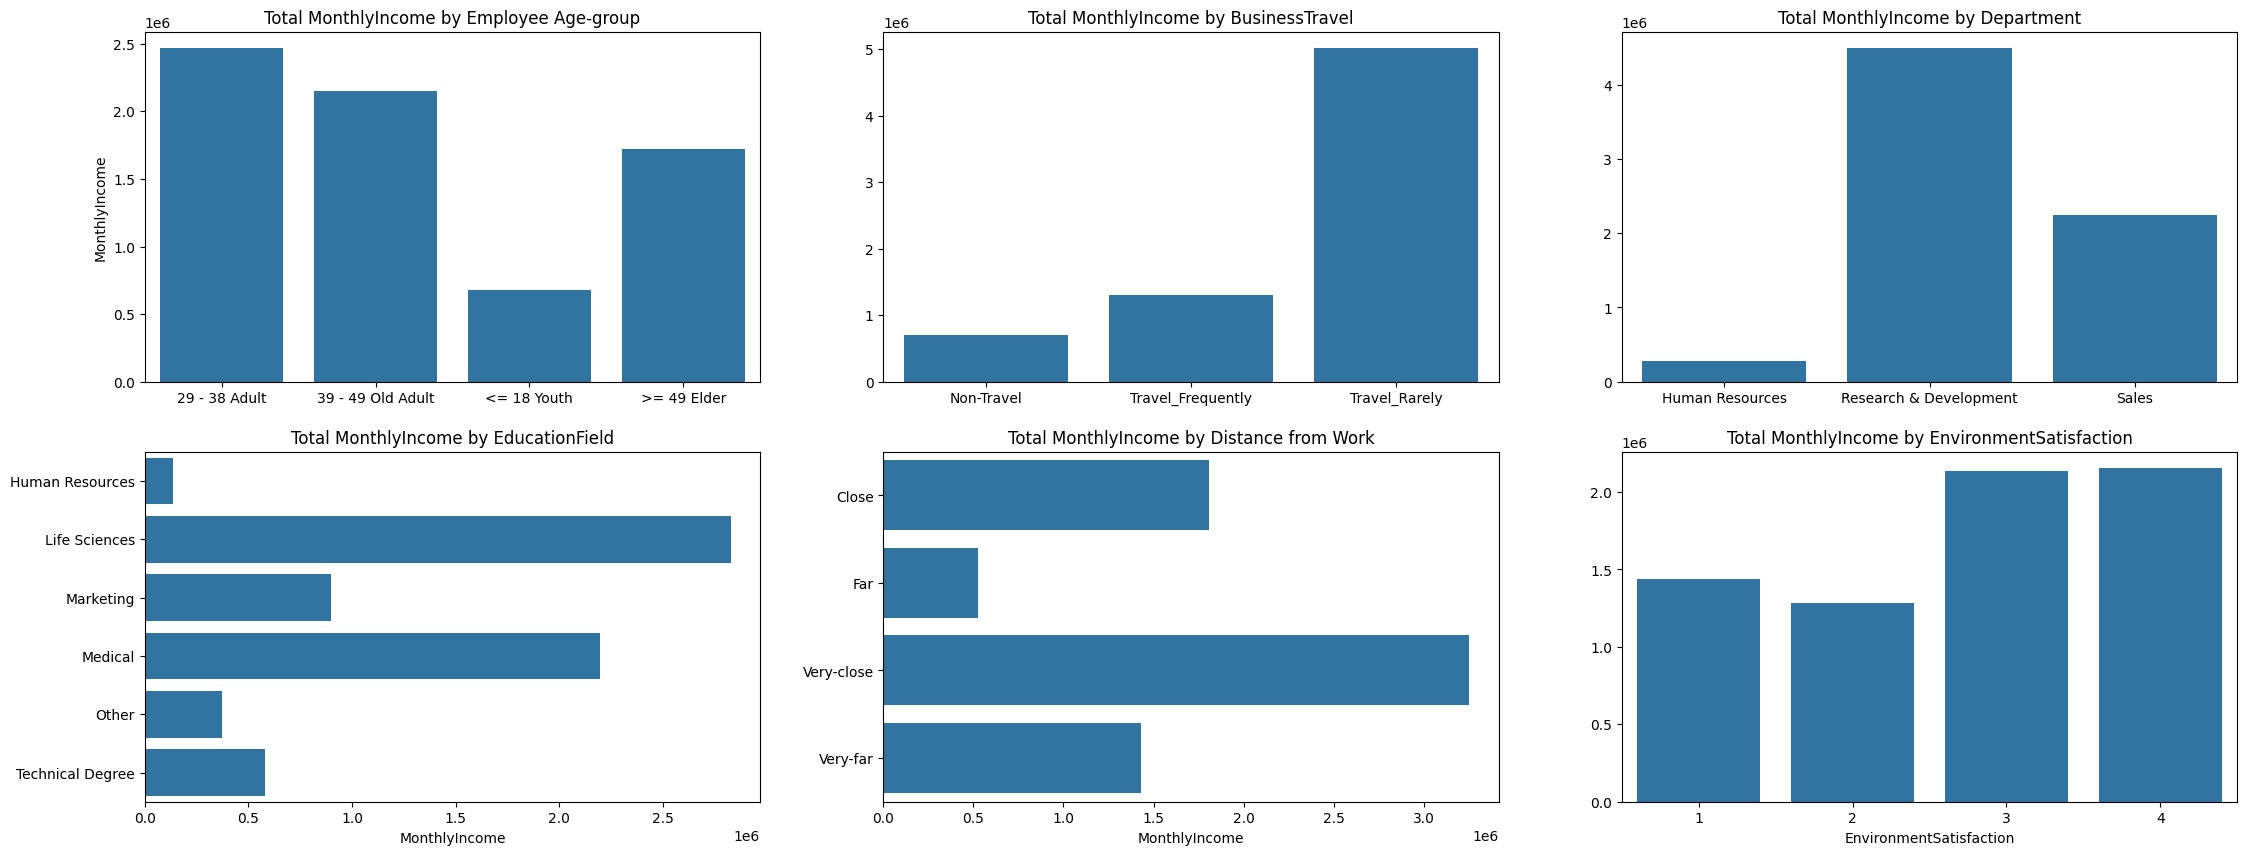

In [15]:
# bivariate analysis for categorical variables - Monthly Income
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

age_att = data.groupby('Age_gp')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='Age_gp', data=age_att, y='MonthlyIncome', ax=axs[0,0])
axs[0,0].set_title('Total MonthlyIncome by Employee Age-group')
axs[0,0].set_xlabel('')

buss_att = data.groupby('BusinessTravel')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='BusinessTravel', data=buss_att, y='MonthlyIncome', ax=axs[0,1])
axs[0,1].set_title('Total MonthlyIncome by BusinessTravel')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

dept_att = data.groupby('Department')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='Department', data=dept_att, y='MonthlyIncome', ax=axs[0,2])
axs[0,2].set_title('Total MonthlyIncome by Department')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

ed_att = data.groupby('EducationField')['MonthlyIncome'].sum().reset_index()
sns.barplot(y='EducationField', data=ed_att, x='MonthlyIncome', ax=axs[1,0])
axs[1,0].set_title('Total MonthlyIncome by EducationField')
axs[1,0].set_ylabel('')

dist_att = data.groupby('dist_gp')['MonthlyIncome'].sum().reset_index()
sns.barplot(y='dist_gp', data=dist_att, x='MonthlyIncome', ax=axs[1,1])
axs[1,1].set_title('Total MonthlyIncome by Distance from Work')
axs[1,1].set_ylabel('')


gen_att = data.groupby('EnvironmentSatisfaction')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='EnvironmentSatisfaction', data=gen_att, y='MonthlyIncome', ax=axs[1,2])
axs[1,2].set_title('Total MonthlyIncome by EnvironmentSatisfaction')
axs[1,2].set_ylabel('');

- The adult age group have the highest monthly income while the youth age group have the lowest monthly income.
- Employees that do not travel have the lowest monthly income while employees that rarely travel have the highest monthly income.
- Employees in the research & development department have the highest monthly income while employees in the human resource department have the lowest attrition count.
- Employees that live very close to the company have the highest attrition count while those taht live far from the company have the lowest monthly income.
- The employees in the life science education field have the highest monthly income while those in the human resource education field have the lowest monthly income.
- Employees that have an environment satisfaction of 4 have the highest monthly income while those that have an environment satisfaction level of 2 have the lowest monthly income.

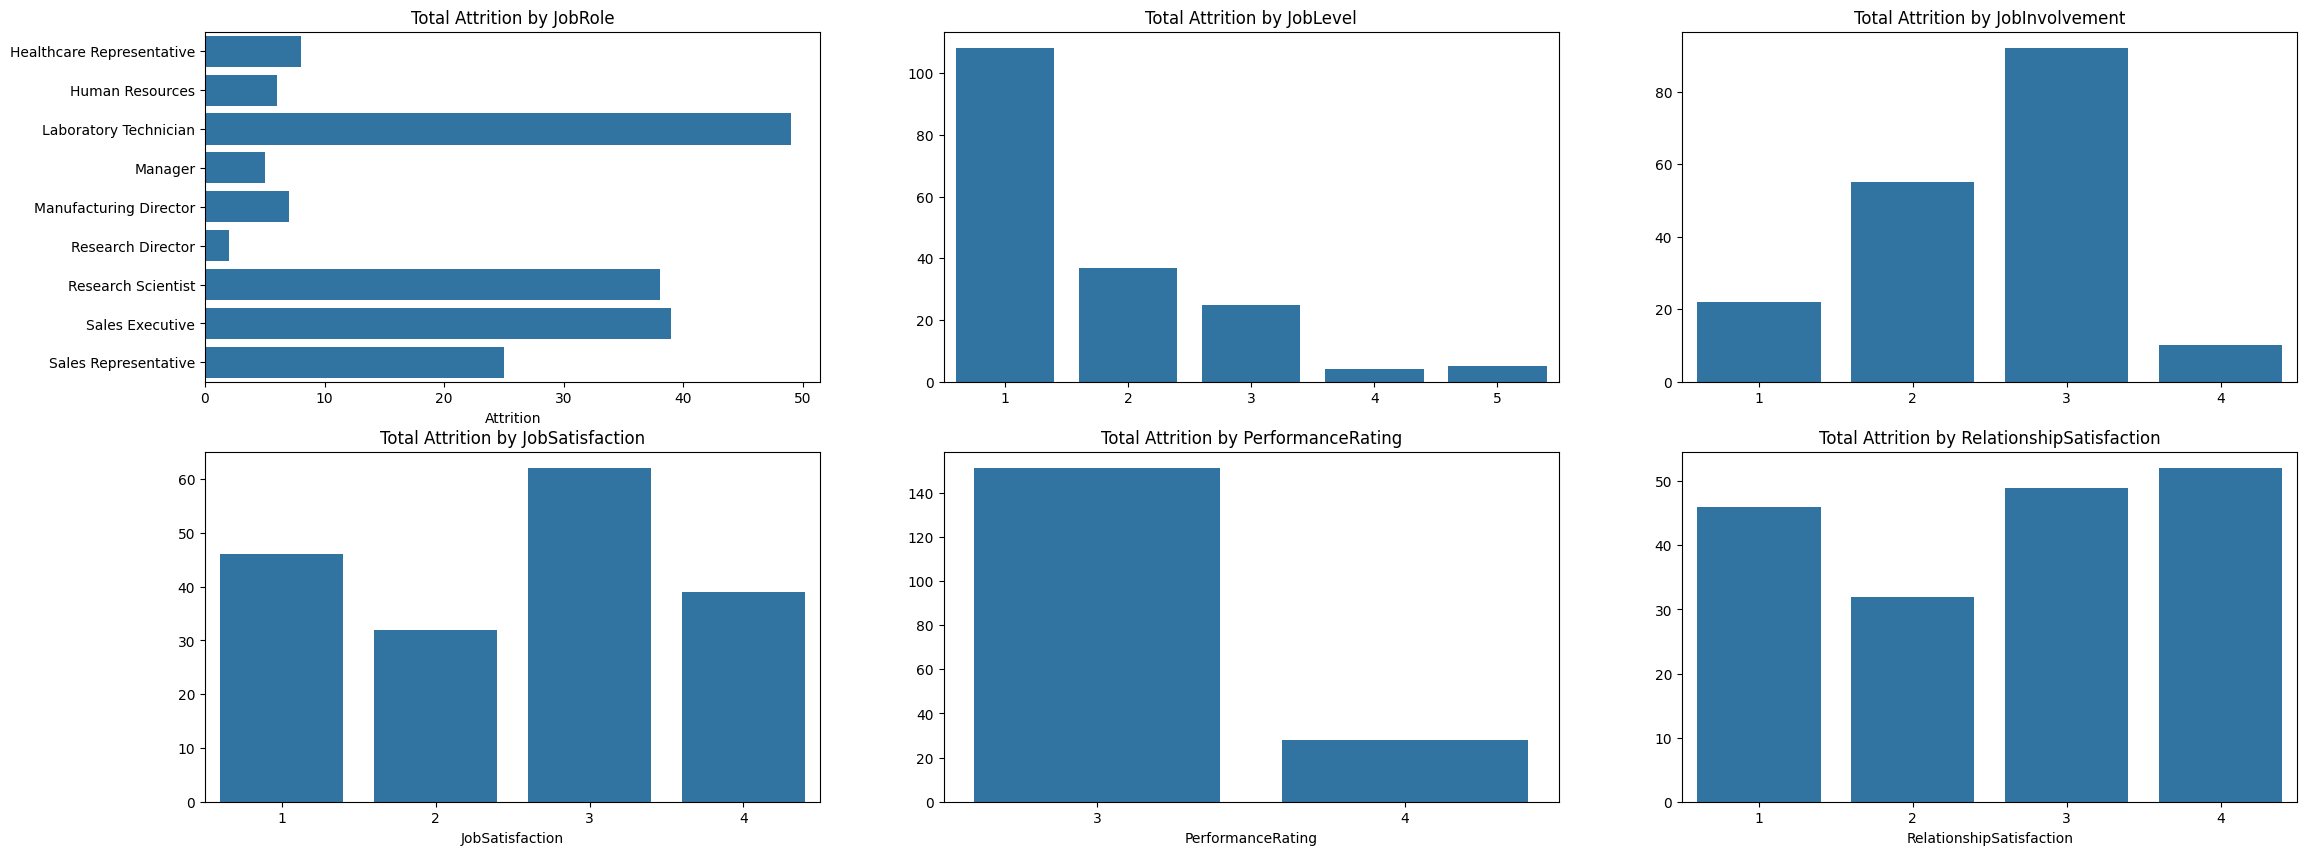

In [16]:
# bivariate analysis for categorical variables - attrition
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

jr_att = data.groupby('JobRole')['Attrition'].sum().reset_index()
sns.barplot(y='JobRole', data=jr_att, x='Attrition', ax=axs[0,0])
axs[0,0].set_title('Total Attrition by JobRole')
axs[0,0].set_ylabel('')

jl_att = data.groupby('JobLevel')['Attrition'].sum().reset_index()
sns.barplot(x='JobLevel', data=jl_att, y='Attrition', ax=axs[0,1])
axs[0,1].set_title('Total Attrition by JobLevel')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

ji_att = data.groupby('JobInvolvement')['Attrition'].sum().reset_index()
sns.barplot(x='JobInvolvement', data=ji_att, y='Attrition', ax=axs[0,2])
axs[0,2].set_title('Total Attrition by JobInvolvement')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

js_att = data.groupby('JobSatisfaction')['Attrition'].sum().reset_index()
sns.barplot(x='JobSatisfaction', data=js_att, y='Attrition', ax=axs[1,0])
axs[1,0].set_title('Total Attrition by JobSatisfaction')
axs[1,0].set_ylabel('')

pr_att = data.groupby('PerformanceRating')['Attrition'].sum().reset_index()
sns.barplot(x='PerformanceRating', data=pr_att, y='Attrition', ax=axs[1,1])
axs[1,1].set_title('Total Attrition by PerformanceRating')
axs[1,1].set_ylabel('')

rs_att = data.groupby('RelationshipSatisfaction')['Attrition'].sum().reset_index()
sns.barplot(x='RelationshipSatisfaction', data=rs_att, y='Attrition', ax=axs[1,2])
axs[1,2].set_title('Total Attrition by RelationshipSatisfaction')
axs[1,2].set_ylabel('');

- Employees with a job level of 1 have the highest attrition rate while those with a job level of 4 have the lowest attrition rate.
- Employees with a job involvement level of 3 have the highest attrition rate while those with a job involvement level of 4 have the lowest attrition rate.
- Employees in the laboratory technician and sales wexecutive roles have the highest attrition count while employees in the research director job role have the lowest attrition count.
- Employees with a job satisfaction level of 3 have the highest attrition rate while those with a job involvement level of 2 have the lowest attrition rate.
- Employees with a performance rating of 3 have the highest attrition rate while those with a performance rating of 4 have the lowest attrition rate.
- Employees with a relationship satisfation rating of 4 have the highest attrition rate while those with a relationship satisfation rating of 2 have the lowest attrition rate.

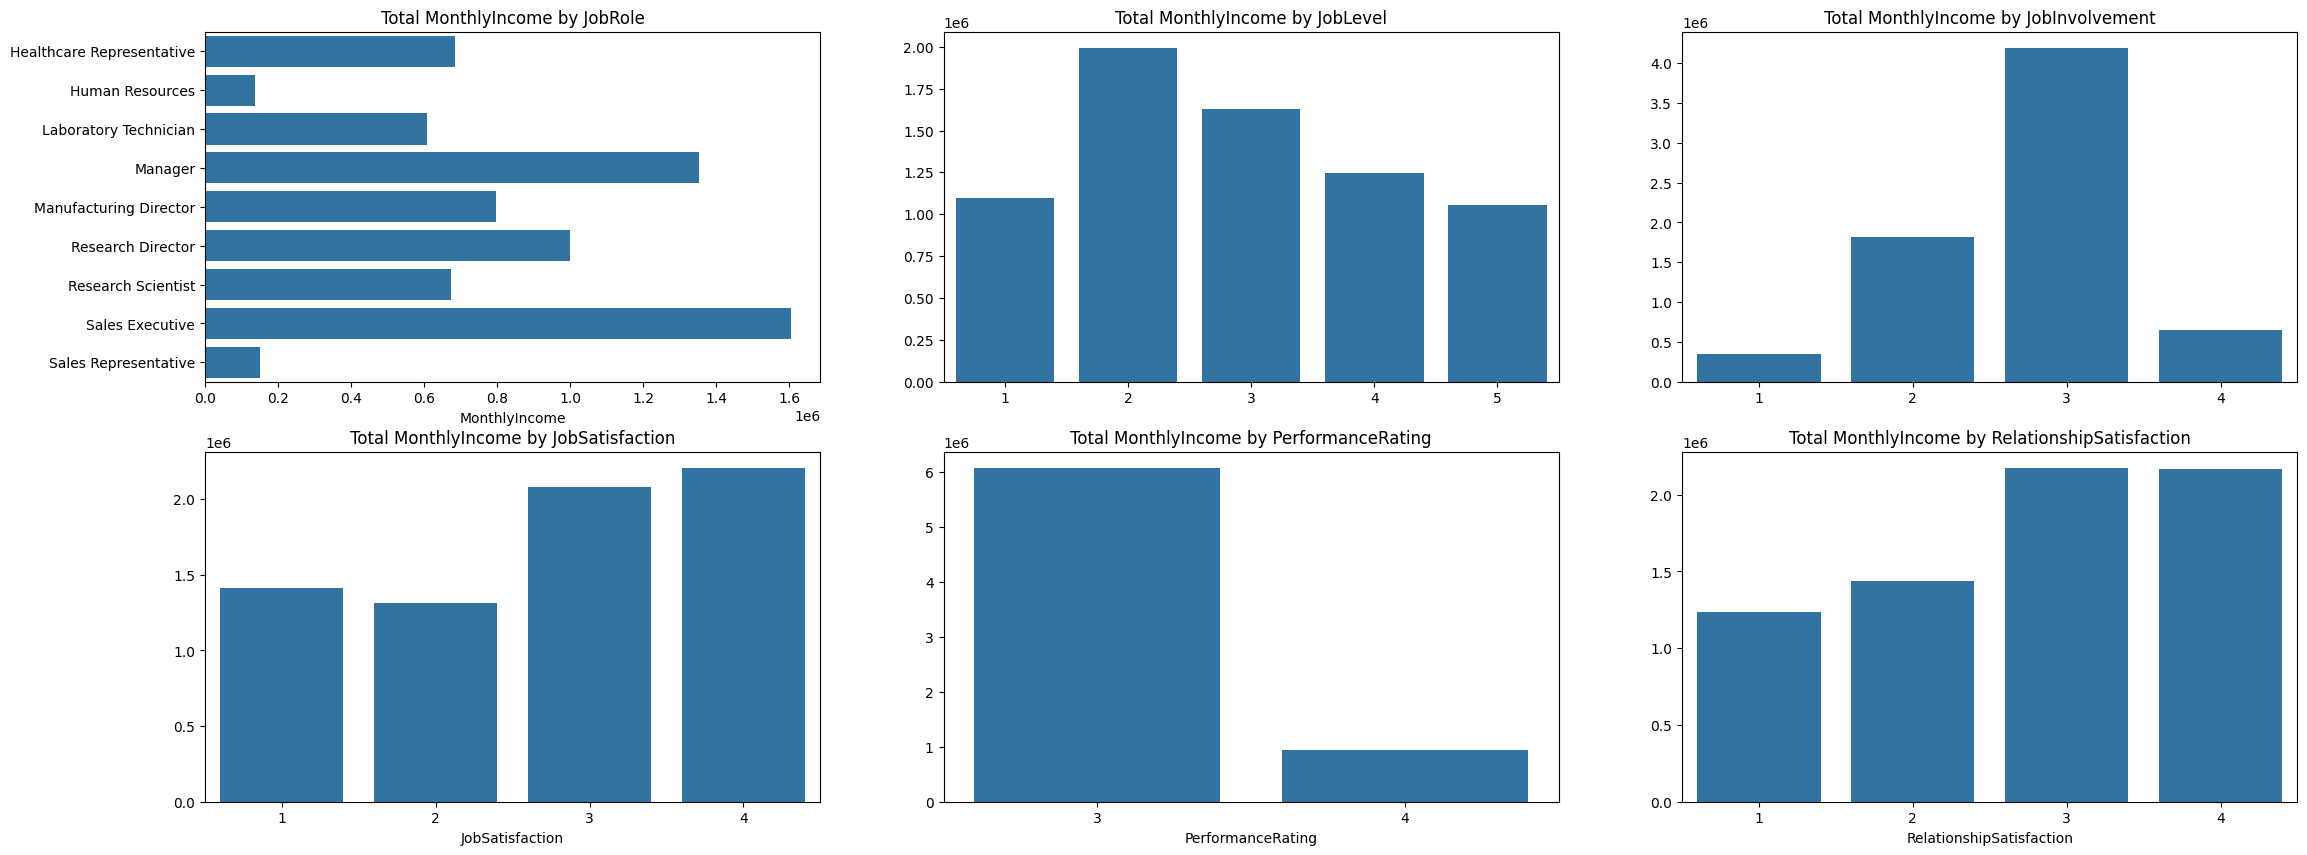

In [17]:
# bivariate analysis for categorical variables - monthly income
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

jr_att = data.groupby('JobRole')['MonthlyIncome'].sum().reset_index()
sns.barplot(y='JobRole', data=jr_att, x='MonthlyIncome', ax=axs[0,0])
axs[0,0].set_title('Total MonthlyIncome by JobRole')
axs[0,0].set_ylabel('')

jl_att = data.groupby('JobLevel')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='JobLevel', data=jl_att, y='MonthlyIncome', ax=axs[0,1])
axs[0,1].set_title('Total MonthlyIncome by JobLevel')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

ji_att = data.groupby('JobInvolvement')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='JobInvolvement', data=ji_att, y='MonthlyIncome', ax=axs[0,2])
axs[0,2].set_title('Total MonthlyIncome by JobInvolvement')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

js_att = data.groupby('JobSatisfaction')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='JobSatisfaction', data=js_att, y='MonthlyIncome', ax=axs[1,0])
axs[1,0].set_title('Total MonthlyIncome by JobSatisfaction')
axs[1,0].set_ylabel('')

pr_att = data.groupby('PerformanceRating')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='PerformanceRating', data=pr_att, y='MonthlyIncome', ax=axs[1,1])
axs[1,1].set_title('Total MonthlyIncome by PerformanceRating')
axs[1,1].set_ylabel('')

rs_att = data.groupby('RelationshipSatisfaction')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='RelationshipSatisfaction', data=rs_att, y='MonthlyIncome', ax=axs[1,2])
axs[1,2].set_title('Total MonthlyIncome by RelationshipSatisfaction')
axs[1,2].set_ylabel('');

- Employees with a job level of 2 have the highest monthly income while those with a job level of 1 have the lowest monthly income.
- Employees with a job involvement level of 3 have the highest monthly income while those with a job involvement level of 1 have the lowest monthly income.
- Employees in the sales executive roles and manager roles have the highest monthly income while employees in the human resources and sales rep have the lowest monthly income.
- Employees with a job satisfaction level of 3 have the highest attrition rate while those with a job involvement level of 2 have the lowest attrition rate.
- Employees with a performance rating of 3 have the highest monthly income while those with a performance rating of 4have the lowest monthly income.
- Employees with a relationship satisfation rating of 3 & 4 have the highest monthly income hile those with a relationship satisfation rating of 1 have the lowest monthly income.

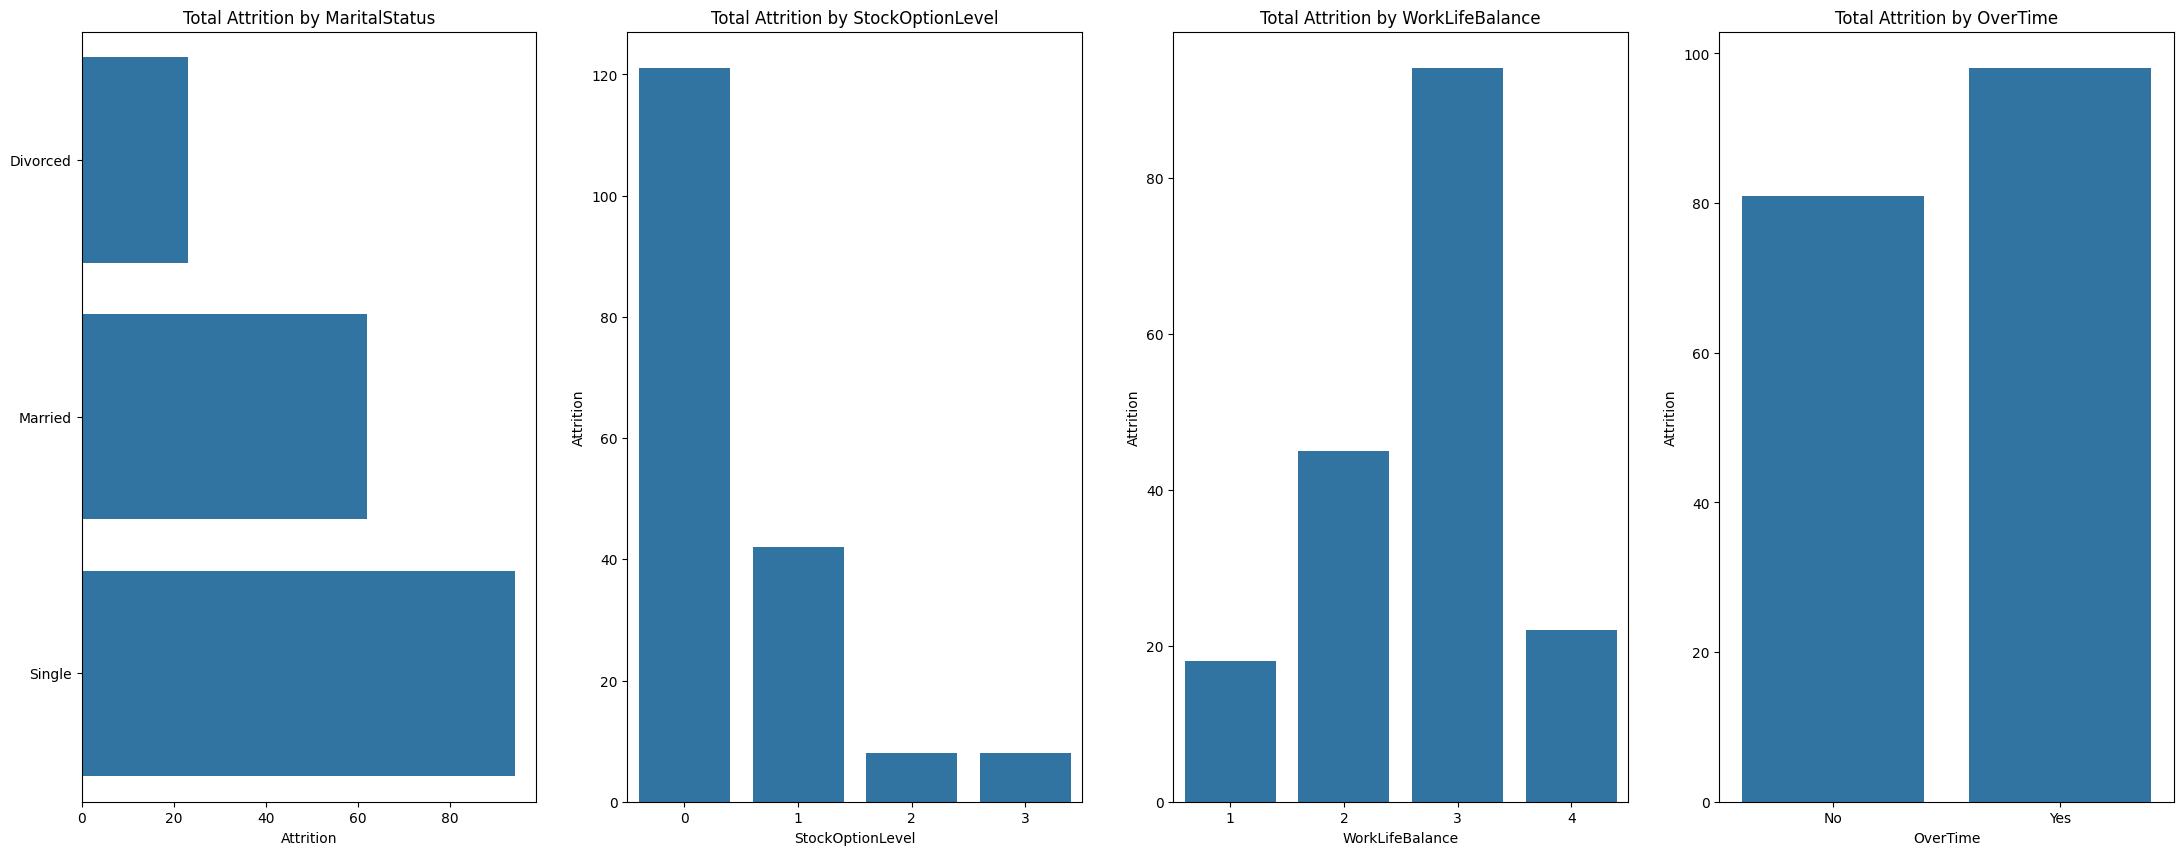

In [18]:
# bivariate analysis for categorical variables - attrition
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(27,10))

mar_att = data.groupby('MaritalStatus')['Attrition'].sum().reset_index()
sns.barplot(y='MaritalStatus', data=mar_att, x='Attrition', ax=axs[0])
axs[0].set_title('Total Attrition by MaritalStatus')
axs[0].set_ylabel('')

st_att = data.groupby('StockOptionLevel')['Attrition'].sum().reset_index()
sns.barplot(x='StockOptionLevel', data=st_att, y='Attrition', ax=axs[1])
axs[1].set_title('Total Attrition by StockOptionLevel')

wk_att = data.groupby('WorkLifeBalance')['Attrition'].sum().reset_index()
sns.barplot(x='WorkLifeBalance', data=wk_att, y='Attrition', ax=axs[2])
axs[2].set_title('Total Attrition by WorkLifeBalance')

ot_att = data.groupby('OverTime')['Attrition'].sum().reset_index()
sns.barplot(x='OverTime', data=ot_att, y='Attrition', ax=axs[3])
axs[3].set_title('Total Attrition by OverTime');

- Single employees have the higehst attrition count while the divorced employees have the lowest attrition count
- Employees with 0 stock option level have the highest attrition count while those with stock option level of 2 and 3 hav ethe lowest attrition count
- Employees with work life balance rating of 3 have the highest attrition count while those with a rating of 1 have the lowest attrition count
- Employees that have overtime have the highest attrition count while those with no overtime have the lowest attrition count

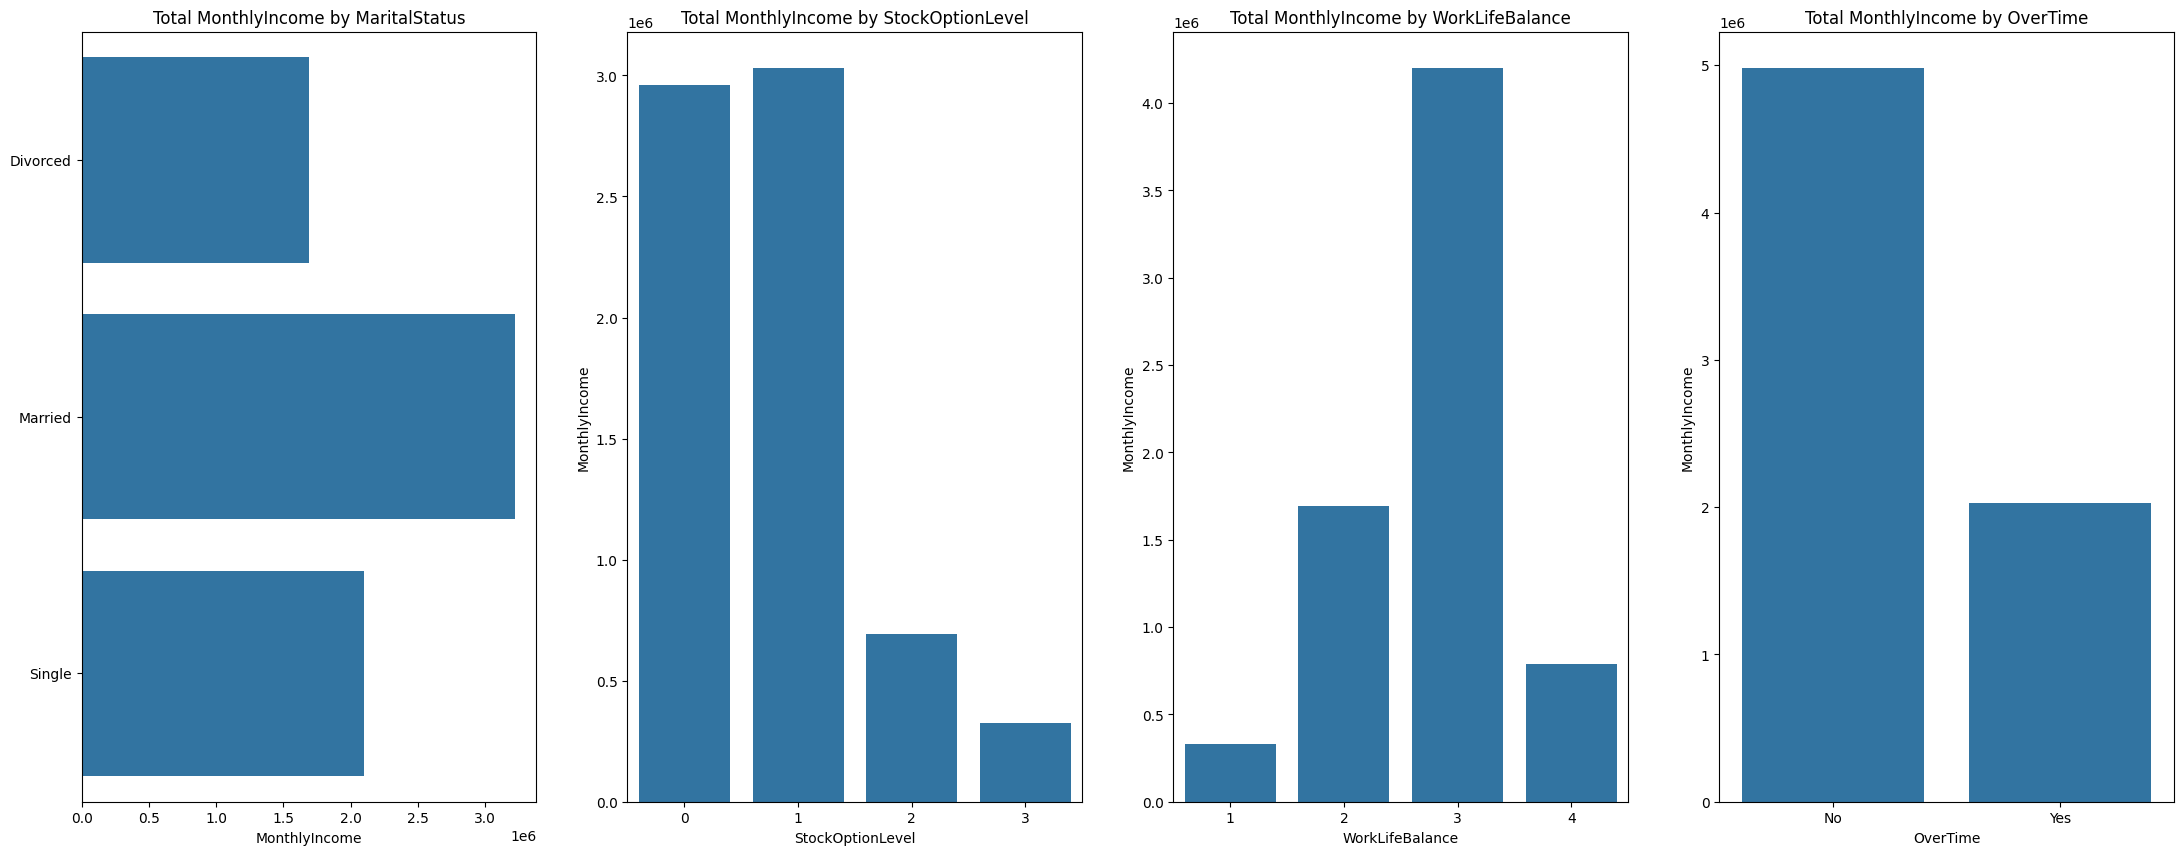

In [19]:
# bivariate analysis for categorical variables - attrition
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(27,10))

mar_att = data.groupby('MaritalStatus')['MonthlyIncome'].sum().reset_index()
sns.barplot(y='MaritalStatus', data=mar_att, x='MonthlyIncome', ax=axs[0])
axs[0].set_title('Total MonthlyIncome by MaritalStatus')
axs[0].set_ylabel('')

st_att = data.groupby('StockOptionLevel')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='StockOptionLevel', data=st_att, y='MonthlyIncome', ax=axs[1])
axs[1].set_title('Total MonthlyIncome by StockOptionLevel')

wk_att = data.groupby('WorkLifeBalance')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='WorkLifeBalance', data=wk_att, y='MonthlyIncome', ax=axs[2])
axs[2].set_title('Total MonthlyIncome by WorkLifeBalance')

ot_att = data.groupby('OverTime')['MonthlyIncome'].sum().reset_index()
sns.barplot(x='OverTime', data=ot_att, y='MonthlyIncome', ax=axs[3])
axs[3].set_title('Total MonthlyIncome by OverTime');

- Married employees have the higehst monthly income while the divorced employees have the lowest monthly income
- Employees with 1 stock option level have the highest monthly income while those with stock option level of 3 hav ethe lowest monthly income
- Employees with work life balance rating of 3 have the highest monthly income while those with a rating of 1 have the lowest monthly income
- Employees that have no overtime have the highest monthly income while those with overtime have the lowest monthly income

C:\Users\hp\AppData\Local\Temp\ipykernel_14204\1671306909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='HourlyRate', data=data, x='Attrition', palette='Set1', ax=axs[0,0])


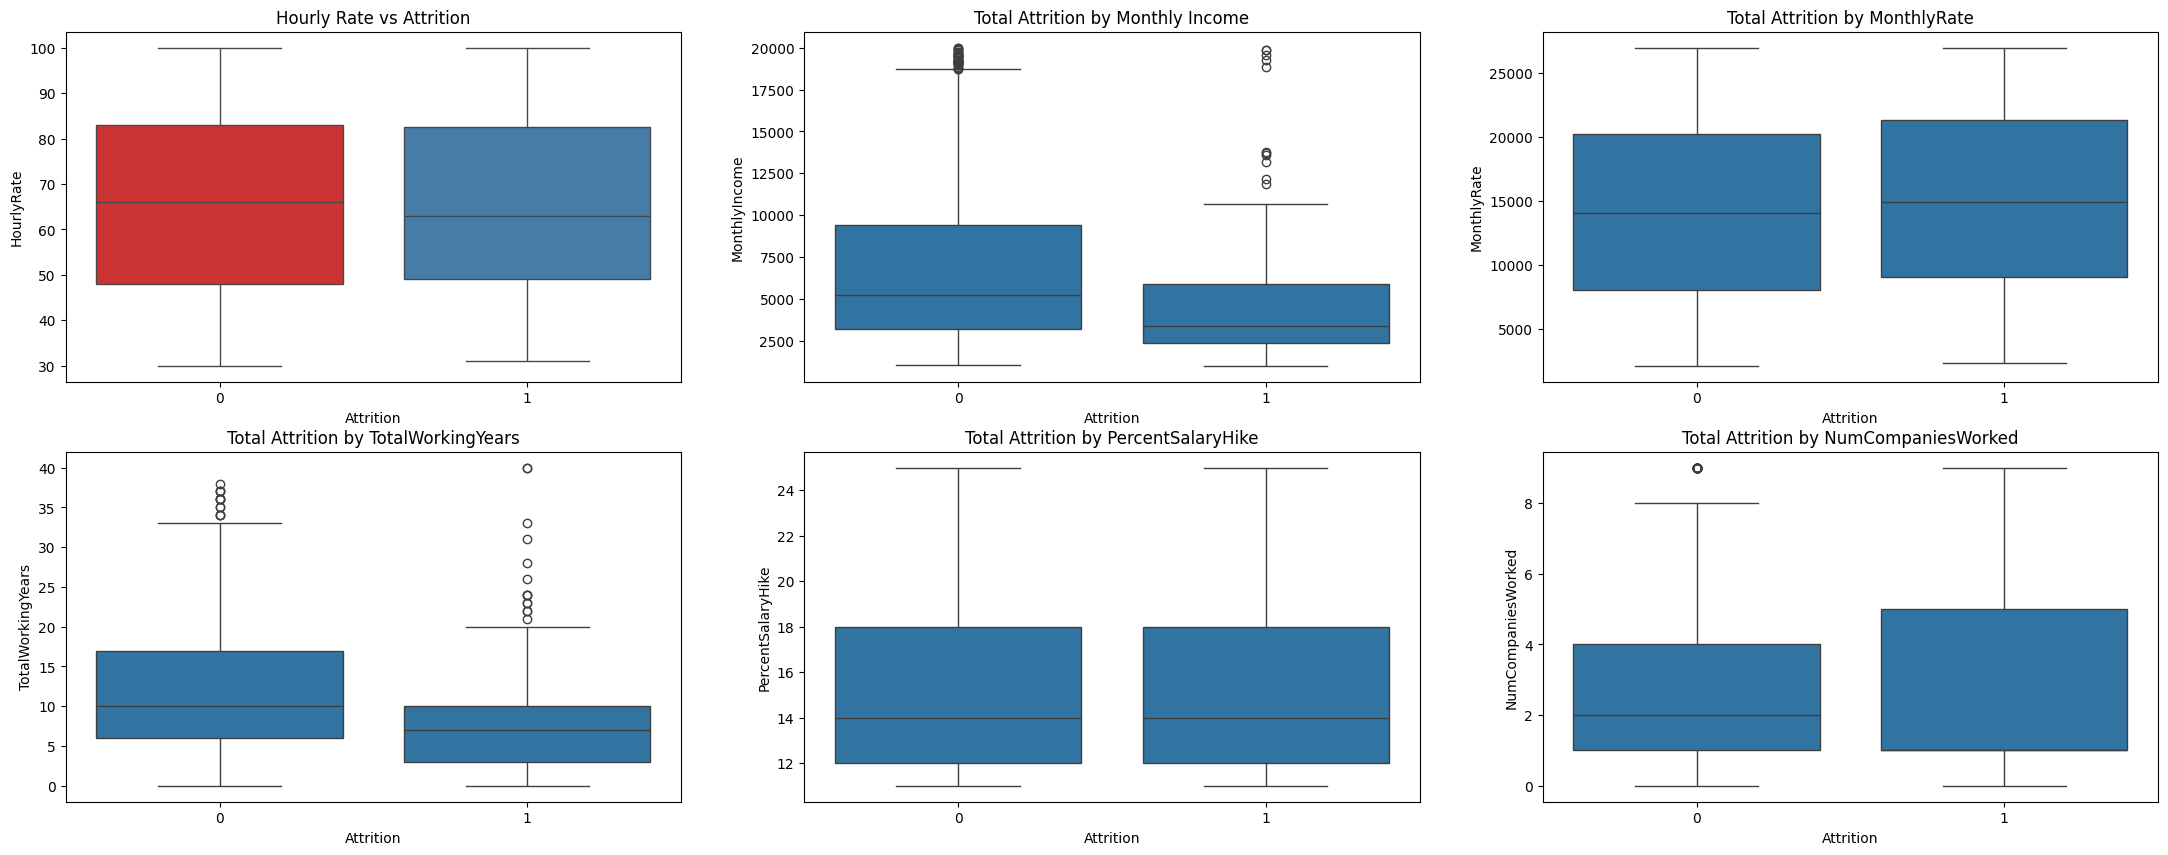

In [20]:
# bivariate analysis for numerical variables - attrition
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

sns.boxplot(y='HourlyRate', data=data, x='Attrition', palette='Set1', ax=axs[0,0])
axs[0,0].set_title('Hourly Rate vs Attrition')

sns.boxplot(y='MonthlyIncome', data=data, x='Attrition', ax=axs[0,1])
axs[0,1].set_title('Total Attrition by Monthly Income')

sns.boxplot(y='MonthlyRate', data=data, x='Attrition', ax=axs[0,2])
axs[0,2].set_title('Total Attrition by MonthlyRate')

sns.boxplot(y='TotalWorkingYears', data=data, x='Attrition', ax=axs[1,0])
axs[1,0].set_title('Total Attrition by TotalWorkingYears')

sns.boxplot(y='PercentSalaryHike', data=data, x='Attrition', ax=axs[1,1])
axs[1,1].set_title('Total Attrition by PercentSalaryHike')

sns.boxplot(y='NumCompaniesWorked', data=data, x='Attrition', ax=axs[1,2])
axs[1,2].set_title('Total Attrition by NumCompaniesWorked');

- Employess with attrition rate of 1 tend to have a lower median value of: hourly rate, monthly income, monthly rate, total working years.

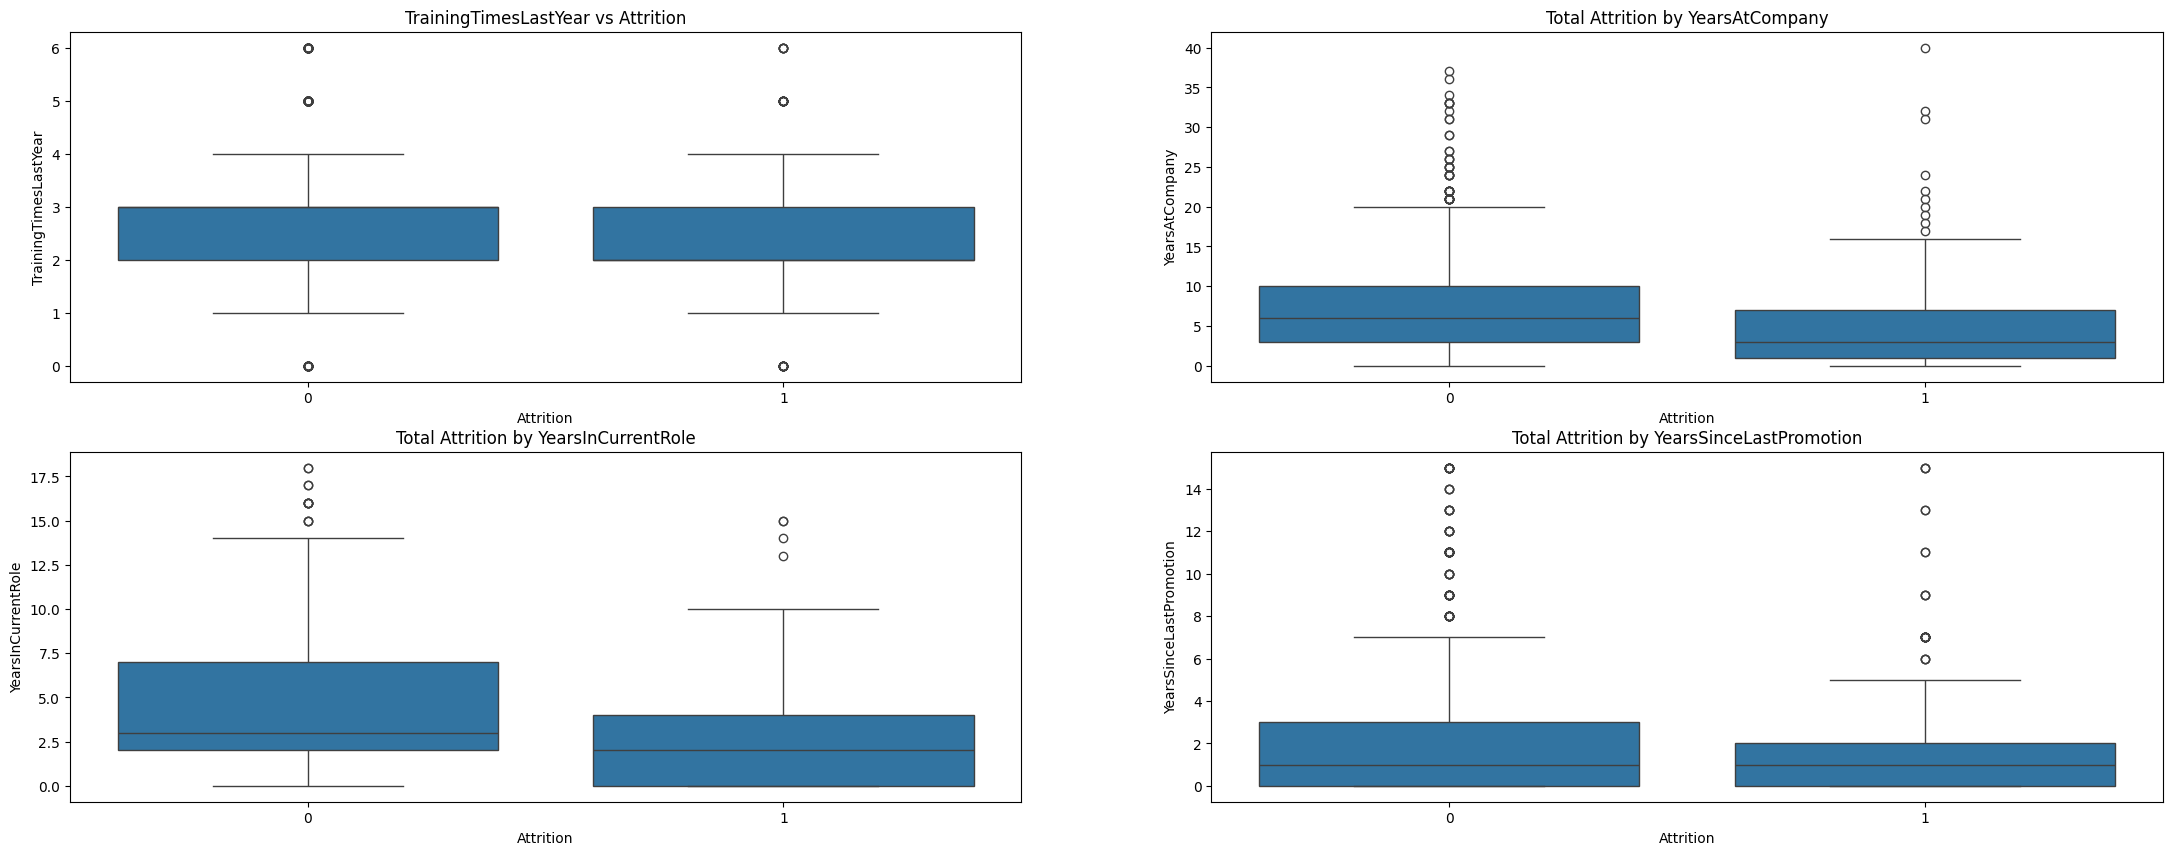

In [21]:
# bivariate analysis for numerical variables
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(27,10))

sns.boxplot(y='TrainingTimesLastYear', data=data, x='Attrition', ax=axs[0,0])
axs[0,0].set_title('TrainingTimesLastYear vs Attrition')

sns.boxplot(y='YearsAtCompany', data=data, x='Attrition', ax=axs[0,1])
axs[0,1].set_title('Total Attrition by YearsAtCompany')

sns.boxplot(y='YearsInCurrentRole', data=data, x='Attrition', ax=axs[1,0])
axs[1,0].set_title('Total Attrition by YearsInCurrentRole')

sns.boxplot(y='YearsSinceLastPromotion', data=data, x='Attrition', ax=axs[1,1])
axs[1,1].set_title('Total Attrition by YearsSinceLastPromotion');

- Employess with attrition rate of 1 tend to have a lower median value of: years worked at company, years in current role, years since last promotion.

#### EDA - Multivariate

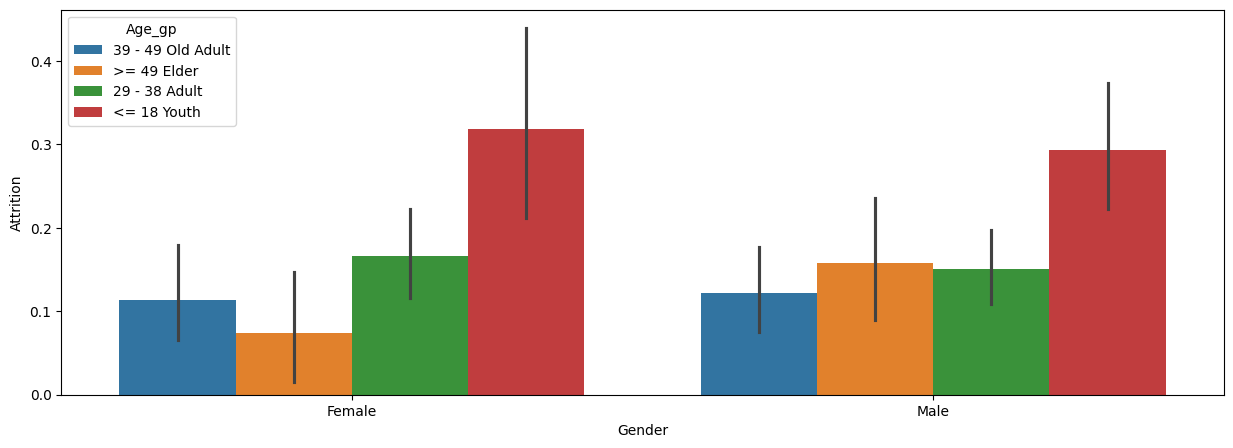

In [22]:
# # customer gender, age gp, profit
plt.figure(figsize=(15,5))
sns.barplot(x='Gender', y='Attrition', data=data, hue='Age_gp');

- The youth age group aross both genders have an higher attrition count
- For females, the elder age group have the lowest attrition count
- For males, the old adult age group have the lowest attrition count

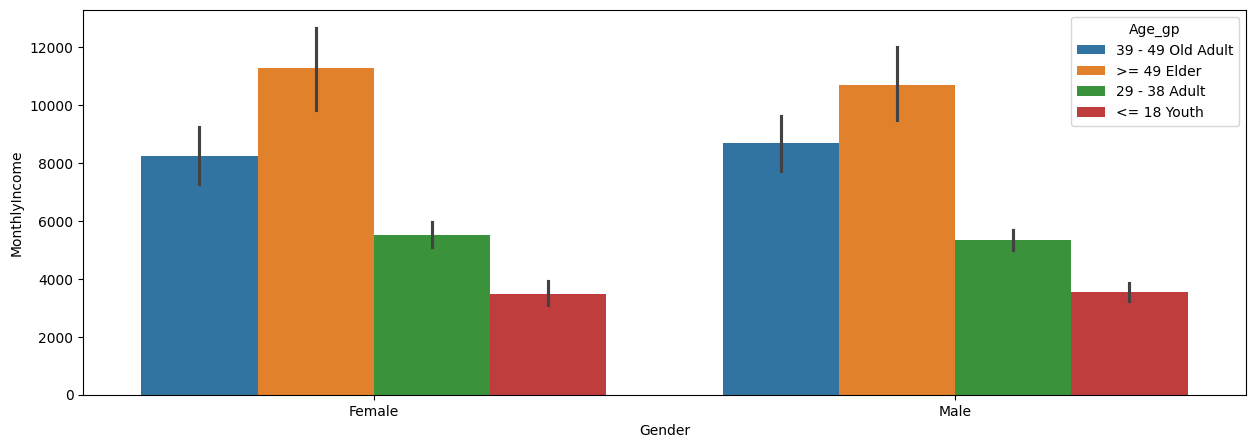

In [23]:
# # customer gender, age gp, monthly income
plt.figure(figsize=(15,5))
sns.barplot(x='Gender', y='MonthlyIncome', data=data, hue='Age_gp');

- The elder age group aross both genders have an higher monthly income while the youth age group have the lowest monthly income

In [24]:
num_data = data.select_dtypes(include=['number'])

num1 = num_data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'Attrition']]

num2 = num_data[['PerformanceRating', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'MonthlyIncome']]

<Figure size 1000x800 with 0 Axes>

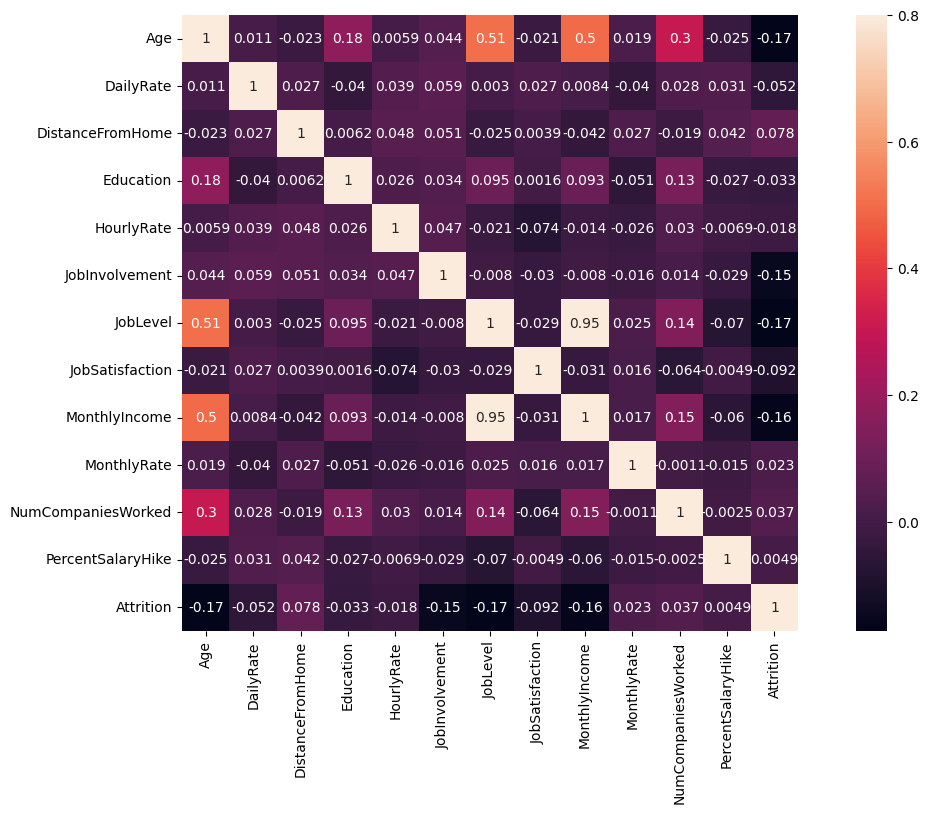

In [25]:
plt.figure(figsize=(10,8))

a = num1.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);

<Figure size 1000x800 with 0 Axes>

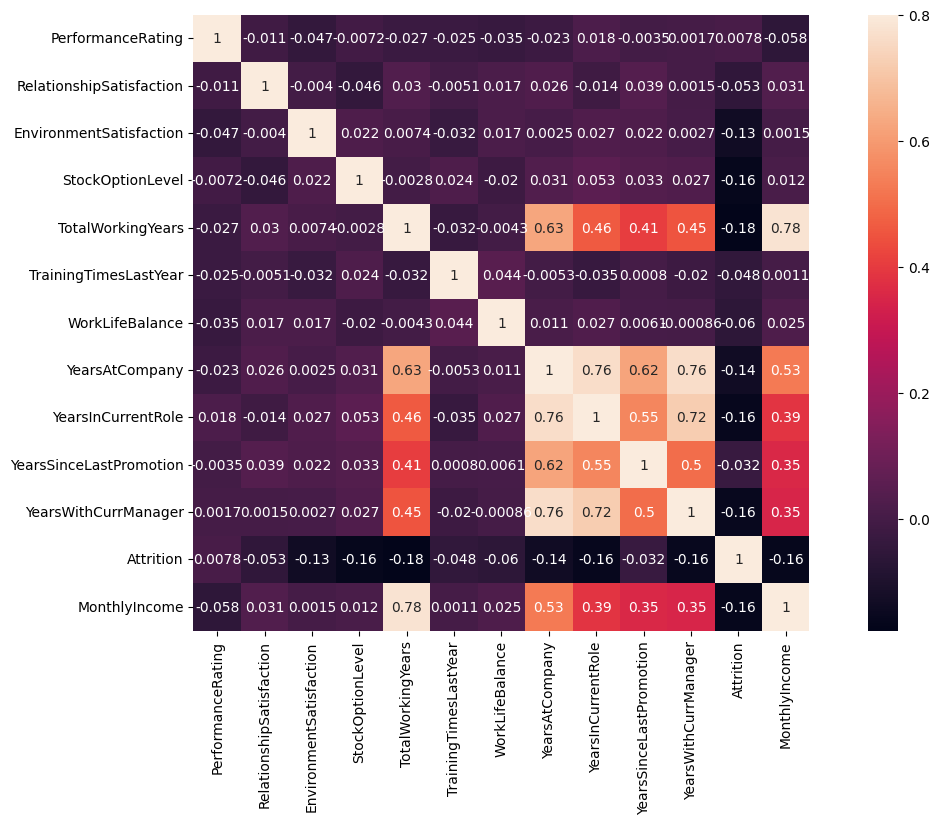

In [26]:
plt.figure(figsize=(10,8))

b = num2.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(b, vmax=.8, square=True, annot=True);

- Attrition have a very weak positive correlation with performance rating, distance from home, monthly rate, number of comapnies worked, percent salary hike.

- Monthly income have a strong positive correlation with total working years, years at company, years in current role, years since last promotion, years with cureent manager, and age.